## DATA MINING 

1. Knowing our data
     * 1.1 Introduction to the data
     * 1.2 Knowing the data
2. Data Preprocessing
     * 2.1 Data Cleaning 
     * 2.2 Data Transformation
3. Clustering
     * 3.1 Clustering Version 1
         * 3.1.1 Numeric 
         * 3.1.2 Categoric 
     * 3.2 Clustering Version 2
     * 3.3 Promotion Clustering
4. Final Decision
     * 4.1 Final Clustering for Donate and Promotion
     * 4.2 Final Solution
     * 4.3 Analysis for the marketing campaign
5. DBSCAN outlier's Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage#, set_link_color_pallete

from scipy.cluster import hierarchy

from pylab import rcParams
import seaborn as sb

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN, estimate_bandwidth
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import mixture

In [2]:
#!pip install pandas-profiling==2.7.1

In [3]:
from pandas_profiling import ProfileReport
##pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

In [4]:
donors = pd.read_csv('donors.csv', index_col=0)

### 1. Knowing our Data

In [5]:
profile = ProfileReport(donors, correlations={'pearson': {'calculate': True},
                                                           'spearman': {'calculate': False},
                                                           'kendall': {'calculate': False},
                                                           'phi_k': {'calculate': False},
                                                           'cramers': {'calculate': False}})

In [6]:
#profile.to_widgets()

In [7]:
profile_min = ProfileReport(donors, correlations={'pearson': {'calculate': True},
                                                               'spearman': {'calculate': False},
                                                               'kendall': {'calculate': False},
                                                               'phi_k': {'calculate': False},
                                                               'cramers': {'calculate': False}}, 
                            minimal=True)
#profile_min.to_widgets()

In [8]:
# AGE - Child, we have DOB, don´t need this one
# Numchild, Missing 87% data.
# TPE10-13, travel time to office donesn´t effect the model
# HC1-HC10, decribes when the sturcture occuipied
# GEOCODE2 zip cover this information
donors_drop_fieds = donors.drop(['NUMCHLD'
             ,'AGE901',                    
             'AGE902',                    
             'AGE903',                   
             'AGE904',                   
             'AGE905',                 
             'AGE906',
             'AGE907',
             'AGEC1',
             'AGEC2',
             'AGEC3',
             'AGEC4',
             'AGEC5',
             'AGEC6',
             'AGEC7',
             'CHILC1',
             'CHILC2',
             'CHILC3',
             'CHILC4',
             'CHILC5',
             'CHIL1',
             'CHIL2',
             'CHIL3',                 
             'CHILD03',
             'CHILD07',
             'CHILD12',
             'CHILD18',
             'GEOCODE2',
             'GEOCODE',
             'TPE10',
             'TPE11',
             'TPE12',
             'TPE13',
             'HC1',
             'HC2',
             'HC3',
             'HC4',
             'HC5',
             'HC6',
             'HC7',
             'HC8',
             'HC9',
             'HC10',
             'OSOURCE'], axis=1)

In [9]:
donors_drop_fieds.shape

(95412, 431)

In [10]:
#Tcode, designation is given occupational fields OCC
#ADATE_2-ADATE_24, we can use other variables insteads of these: CARDPROM, MAXADATE, NUMPROM, CARDPM12, NUMPRM12
donors_drop_tcode_adate = donors_drop_fieds.drop(['TCODE'
             ,'ADATE_2',
             'ADATE_3',
             'ADATE_4',
             'ADATE_5',
             'ADATE_6',
             'ADATE_7',
             'ADATE_8',
             'ADATE_9',
             'ADATE_10',
             'ADATE_11',
             'ADATE_12',
             'ADATE_13',
             'ADATE_14',
             'ADATE_15',
             'ADATE_16',
             'ADATE_17',
             'ADATE_18',
             'ADATE_19',
             'ADATE_20',
             'ADATE_21',
             'ADATE_22',
             'ADATE_23',
             'ADATE_24'], axis=1)

In [11]:
donors_drop_tcode_adate.shape

(95412, 407)

In [12]:
# New profile after drop some columuns
#new_profile = ProfileReport(donors_drop_tcode_adate, minimal=True)
#new_profile.to_file('DM_Group_F_ Report_new_min.html')

###### Getting to know the numeric attributes

In [13]:
numCols = donors_drop_tcode_adate.select_dtypes(include=['int', 'float'])

In [14]:
pd.set_option('display.max_rows', False)
pd.set_option('display.max_columns', False)
pd.set_option('display.width', False)

In [15]:
# A correlation matrix:
corr = numCols.corr().abs()
corr

,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,...,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
INCOME,1.000000,0.456094,0.004738,0.007168,0.035434,0.007814,0.018775,0.043737,0.018271,0.066752,0.028998,0.001530,0.015116,0.025647,0.058723,0.001422,0.031757,0.002653,0.007642,0.101555,0.078939,0.014029,0.019425,0.011750,0.405398,0.006283,0.013342,0.000107,0.123610,0.076432,0.085427,0.066352,0.062438,0.058234,0.081828,0.051496,0.115583,0.032093,0.123743,0.070853,...,0.216727,0.045909,0.031989,0.079540,0.078826,0.004450,0.022498,0.148167,0.138823,0.431731,0.121310,0.095767,0.116445,0.083356,0.105356,0.121264,0.106047,0.116968,0.119974,0.092063,0.103990,0.078650,0.101949,0.062625,0.092464,0.123440,0.097609,0.108370,0.092798,0.018978,0.124218,0.106561,0.096302,0.072044,0.091475,0.025956,0.114931,0.066211,0.029094,0.079972
WEALTH1,0.456094,1.000000,0.020244,0.003759,0.024914,0.008433,0.040931,0.055357,0.023126,0.065036,0.025857,0.018532,0.000971,0.021267,0.069213,0.004795,0.028538,0.033125,0.058591,0.145599,0.103128,0.071859,0.019336,0.018050,0.869431,0.019697,0.032652,0.016705,0.253141,0.174903,0.159856,0.070044,0.068192,0.237272,0.213536,0.144002,0.082447,0.168279,0.142508,0.064245,...,0.387736,0.088145,0.033945,0.053463,0.046991,0.001190,0.000982,0.050974,0.064151,0.309180,0.013501,0.068812,0.084968,0.036353,0.085949,0.086509,0.072785,0.093731,0.087295,0.068803,0.083461,0.085906,0.065651,0.045233,0.058082,0.086438,0.086323,0.067954,0.094169,0.007248,0.083288,0.065309,0.072440,0.055056,0.067108,0.017545,0.086482,0.027074,0.017367,0.052808
HIT,0.004738,0.020244,1.000000,0.273154,0.190401,0.516363,0.280819,0.374718,0.256148,0.164642,0.304608,0.347600,0.411210,0.355638,0.382129,0.061268,0.260734,0.007942,0.054985,0.007429,0.042281,0.015554,0.007246,0.001991,0.044952,0.053545,0.054021,0.051021,0.055570,0.009937,0.067470,0.003013,0.046420,0.031946,0.013938,0.017082,0.006925,0.011490,0.005286,0.001592,...,0.020033,0.022918,0.023729,0.070476,0.074104,0.037823,0.045792,0.033359,0.033888,0.806524,0.001475,0.001937,0.009385,0.005923,0.012765,0.011361,0.010562,0.022351,0.001075,0.038343,0.003682,0.011395,0.002006,0.008963,0.017543,0.010186,0.007274,0.005638,0.008678,0.033941,0.043545,0.044594,0.029573,0.002322,0.007213,0.008685,0.014705,0.000420,0.213498,0.000448
MBCRAFT,0.007168,0.003759,0.273154,1.000000,0.213852,0.284780,0.113132,0.268072,0.171070,0.075541,0.153036,0.172247,0.133748,0.254192,0.133217,0.041039,0.109104,0.010031,0.015452,0.006335,0.001949,0.003933,0.003967,0.005906,0.000913,0.004835,0.004741,0.006616,0.023341,0.028869,0.004073,0.005078,0.000332,0.037185,0.030987,0.009434,0.019022,0.010830,0.014846,0.010925,...,0.006361,0.001401,0.001737,0.017530,0.015903,0.006057,0.005588,0.071326,0.090898,NaN,0.042120,0.006382,0.014062,0.013850,0.035847,0.021697,0.011980,0.023710,0.016683,0.017085,0.021515,0.003826,0.013051,0.004918,0.011734,0.000241,0.028415,0.009685,0.032775,0.000309,0.011206,0.015940,0.019897,0.005536,0.011943,0.001517,0.016241,0.001785,0.018020,0.014721
MBGARDEN,0.035434,0.024914,0.190401,0.213852,1.000000,0.200152,0.069470,0.186100,0.077892,0.031956,0.207128,0.142152,0.116061,0.379946,0.091908,0.035900,0.063556,0.000026,0.005695,0.001364,0.006192,0.005976,0.006086,0.001342,0.030286,0.010831,0.010362,0.012106,0.067150,0.035512,0.052562,0.003608,0.004766,0.038182,0.018805,0.004154,0.041153,0.035151,0.022710,0.024177,...,0.013651,0.005671,0.004556,0.033571,0.028760,0.003634,0.005571,0.0217

##### Based on Pandas Profiling correlation
 ###### The attributes where correlation high are removed

In [16]:
# IC1 to IC23 High coorelation and also we have income variable
# POP901- POP904 High coorelation
# POP90C1- POP90C5 High coorelation
# RAMNT_3 to RAMNT_24
# ETH13 to ETH5   High coorelation
# HHAGE3 to HHAGE1 High coorelation
# HHN3- HHN6 High coorelation
# DW2, DW5, DW6  High coorelation
# HV2, HV4 High coorelation
# HU2 High coorelation
# HHD3, HHD2, HHD2, HHD7, HHD11 High coorelation
# ETHC4, ETHC5 High coorelation
# HVP1, HVP2, HVP3, HVP6 High coorelation
# RHP1, RHP2, RHP3 High coorelation
# HUPA2, HUPA6 High coorelation
# RP1 High coorelation
# NGIFTALL High coorelation
# RAMNT_3,RAMNT_10 High coorelation
# NUMPROM High coorelation
# HHAS1 High coorelation
# TPE4  High coorelation
# LFC2, LFC3, LFC4, LFC5 High coorelation
# EIC1 High coorelation
# AFC2, AFC4 High coorelation
# LSC2 High coorelation
# HC8, HC18 High coorelation
# HHP2 
# MOR Flag # HIT (Mail Order Response)
                         # Indicates total number of known times the donor has
                         #  responded to a mail order offer other than PVA's.
# MBCRAFT, MBGARDEN, MBBOOKS, MBCOLECT, MAGFAML, MAGFEM, MAGMALE,  PUBCULIN, PUBHLTH,
                  #PUBDOITY, PUBNEWFN, PUBPHOTO, PUBOPP, PUBGARDN
donors_correlation_drop = donors_drop_tcode_adate.drop(['RAMNT_3','RAMNT_4','RAMNT_5','RAMNT_6','RAMNT_7',
                                                        'RAMNT_8','RAMNT_9','RAMNT_10','RAMNT_11','RAMNT_12',
                                                        'RAMNT_13','RAMNT_14','RAMNT_15','RAMNT_16','RAMNT_17',
                                                        'RAMNT_18','RAMNT_19','RAMNT_20','RAMNT_21','RAMNT_22',
                                                        'RAMNT_23','RAMNT_24',
                                                        'IC1','IC2','IC3','IC4','IC5','IC6','IC7','IC8','IC9','IC10',
                                                        'IC11','IC12','IC13','IC14','IC15','IC16','IC17','IC18','IC19',
                                                        'IC20','IC21','IC22','IC23',
                                                        'MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT',
                                                        'MAGFAML','MAGFEM','MAGMALE',
                                                        'PUBCULIN','PUBHLTH','PUBDOITY','PUBGARDN','PUBNEWFN','PUBPHOTO','PUBOPP',
                                                        'POP901','POP902','POP903',
                                                        'POP90C1','POP90C2','POP90C3','POP90C4','POP90C5',
                                                        'ETH13',
                                                        'HHAGE3',
                                                        'HHN3', 'HHN4','HHN5','HHN6', 
                                                        'DW2','DW5','DW6',
                                                        'HV2','HV4',
                                                        'HU2','HHP2',
                                                        'HHD3','HHD1','HHD2','HHD7','HHD11',
                                                        'ETHC4','ETHC5',
                                                        'HVP1','HVP2','HVP3','HVP6',
                                                        'RHP1','RHP2','RHP3',
                                                        'HUPA2','HUPA6',
                                                        'RP1', 
                                                        'NGIFTALL',
                                                        'NUMPROM', 
                                                        'HHAS1',
                                                        'TPE4',
                                                        'LFC2','LFC3','LFC4','LFC5',
                                                        'EIC1', 
                                                        'AFC2','AFC4',
                                                        'LSC2',
                                                        'HC18'], axis=1)

In [17]:
donors_correlation_drop.shape

(95412, 297)

###### Getting to know the categorical attributes

In [18]:
catCols = donors_drop_tcode_adate.select_dtypes(exclude=['int', 'float'])
catCols

,ODATEDW,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,...,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,MAXADATE,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
0,2009-01-01,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,F,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,...,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,NaN,NaN,NaN,2015-07-01,2015-05-01,2015-05-01,2015-03-01,NaN,NaN,NaN,NaN,NaN,2014-08-01,2014-06-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,L,E,X,X,X
1,2014-01-01,CA,91326,,,1972-02-01,0,,,,,XXXX,S1,H,M,3,,,,,,,,,,,,,,,,,,,,,,,,L2G,...,,N1E,N1E,N1E,N1E,,F1E,2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,L,G,X,X,X
2,2010-01-01,NC,27017,,,NaN,0,,,,,XXXX,R2,U,M,3,,,,,,,,,,,,,,,,,,,,,,,X,L4E,...,S4D,S4D,,,S4D,S4D,S3D,2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-01,NaN,2015-06-01,NaN,2015-04-01,NaN,2015-01-01,NaN,NaN,NaN,2014-09-01,2014-07-01,2014-06-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,L,E,X,X,X
3,2007-01-01,CA,95953,,,1948-01-01,0,,,,,XXXX,R2,U,F,3,,,,,,,,,,,,,,,,,,,,,,,X,L4E,...,S2D,A1D,A1D,A1D,A1D,,,2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,2015-09-01,NaN,2015-08-01,NaN,2015-05-01,2015-03-01,NaN,NaN,2014-11-01,2014-11-01,NaN,NaN,NaN,2007-11-01,2014-11-01,2015-12-01,2007-02-01,2007-11-01,L,E,X,X,X
4,2006-01-01,FL,33176,,,1940-01-01,0,X,X,,,XXXX,S2,H,F,3,,12,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,...,A2D,A3D,A3D,A3D,I4E,A3D,A3D,2017-02-01,NaN,NaN,NaN,NaN,NaN,2016-01-01,NaN,NaN,NaN,NaN,NaN,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-01,2016-01-01,2016-01-01,1999-03-01,2000-05-01,L,F,X,X,X
5,2014-01-01,AL,35603,,,NaN,0,,,,,XXXX,T2,,,,,,,,,,,,,,,,,,,,,,,,,,X,L1F,...,N2E,N2E,N2E,N2E,N2E,,F1E,2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-01,NaN,2014-12-01,NaN,NaN,NaN,2014-07-01,2014-07-01,2014-12-01,2015-06-01,2014-01-01,2014-07-01,L,F,X,X,X
6,2007-01-01,IN,46755,,,1980-01-01,0,,,,,XXXX,T2,H,F,3,,,,,,,,,Y,Y,Y,Y,,,,,,,,,,3,X,L1E,...,S2E,A2E,,A2E,A2E,A3E,A3E,2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01,NaN,NaN,NaN,NaN,NaN,2014-10-01,NaN,NaN,2007-05-01,2014-10-01,2015-04-01,2007-01-01,2007-05-01,L,E,X,X,X
7,2014-01-01,LA,70611,,,NaN,0,,,,,XXXX,T2,U,F,1,,,,,,,,,,,,,,,,,,,,,,,,L3E,...,N2D,N2D,N2D,N2D,N2D,,F1D,2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-01,2015-07-01,NaN,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-01,2015-07-01,2015-08-01,2015-08-01,2014-01-01,2014-07-01,L,E,X,X,X
8,2008-01-01,IA,51033,,,NaN,0,,,,,XXXX,R2,U,M,3,,,,,,,,,,,,,,,,,,,,,,,X,L1F,...,A1F,A1F,A1F,A1F,A1F,A1F,A1F,2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,NaN,NaN,NaN,2008-09-01,2013-12-01,2015-07-01,2008-01-01,2008-09-01,L,F,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [19]:
#we have to calculate the mode:
catCols.mode()

,ODATEDW,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,...,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,MAXADATE,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
0,2015-01-01,CA,85351,,,1968-01-01,0,,,,,XXXX,R2,H,F,3,,,,,,,,,,,,,,,,,,,,,,,,L1F,...,,,,,,,,2017-02-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-11-01,2015-09-01,2015-08-01,2015-06-01,2015-05-01,2015-04-01,2015-03-01,2015-01-01,2014-12-01,2014-12-01,2014-11-01,2014-09-01,2014-08-01,2014-07-01,2016-02-01,2015-12-01,2015-12-01,2015-01-01,2015-04-01,L,F,X,X,X
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#how many values we have for each categorie of categories attributes
catCols["STATE"].value_counts(dropna=False)
catCols["GENDER"].value_counts(dropna=False)

F    51277
M    39094
      2957
U     1715
J      365
A        2
C        2
Name: GENDER, dtype: int64

array([<AxesSubplot:ylabel='count'>], dtype=object)

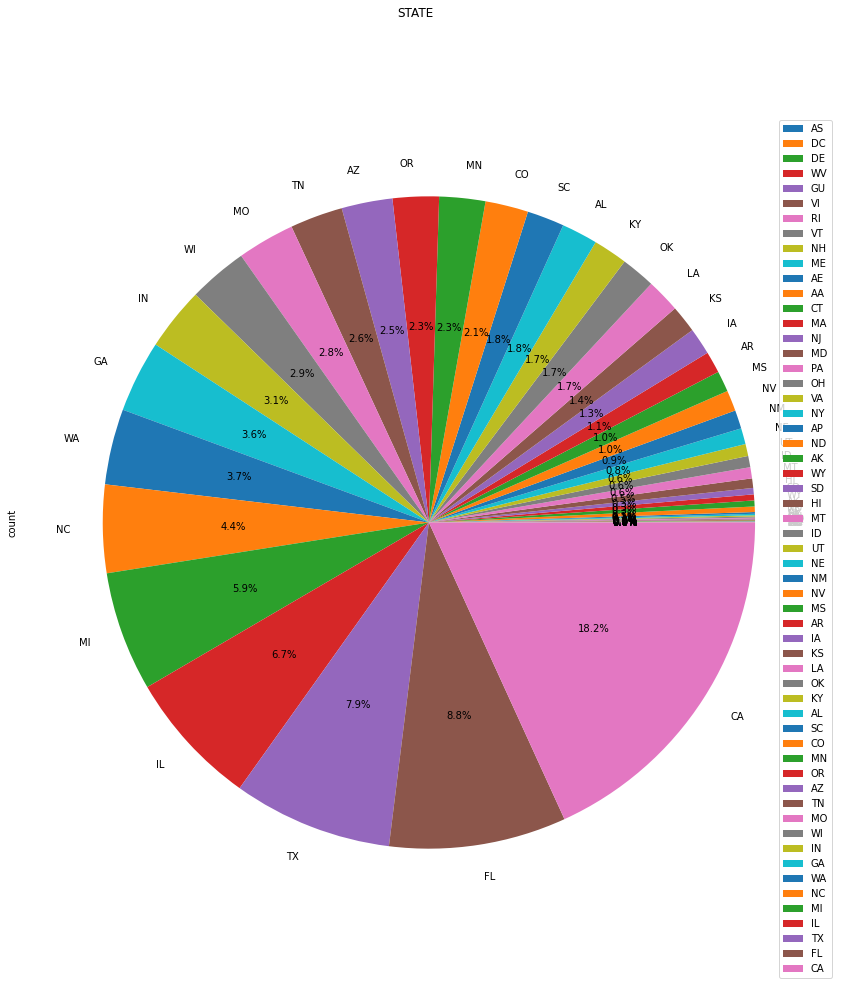

In [21]:
#Plots for States
state = donors_correlation_drop["STATE"].value_counts(ascending=True)
state = state.reset_index()
state = state.rename({'index':'STATE','STATE':'count'}, axis='columns')

fig, ax2 = plt.subplots(figsize=(15, 15))
state.plot(kind='pie', x= "State", y = 'count', 
             title = 'STATE',
             legend = True,
             labels = state["STATE"],
             subplots=True,autopct='%1.1f%%',
             ax = ax2)

array([<AxesSubplot:ylabel='count'>], dtype=object)

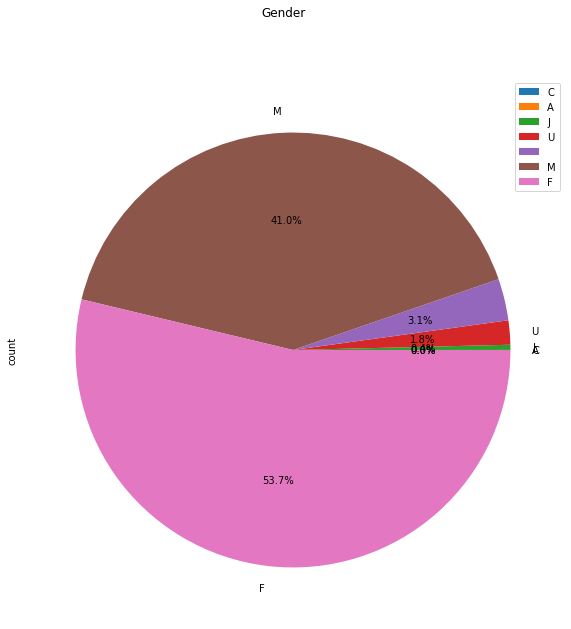

In [22]:
#Plots for Gender
gender = donors_correlation_drop["GENDER"].value_counts(ascending=True)
gender = gender.reset_index()
gender = gender.rename({'index':'GENDER','GENDER':'count'}, axis='columns')

fig, ax2 = plt.subplots(figsize=(10, 10))
gender.plot(kind='pie', x= "Gender", y = 'count', 
             title = 'Gender',
             legend = True,
             labels = gender["GENDER"],
             subplots=True,autopct='%1.1f%%',
             ax = ax2)


array([<AxesSubplot:ylabel='count'>], dtype=object)

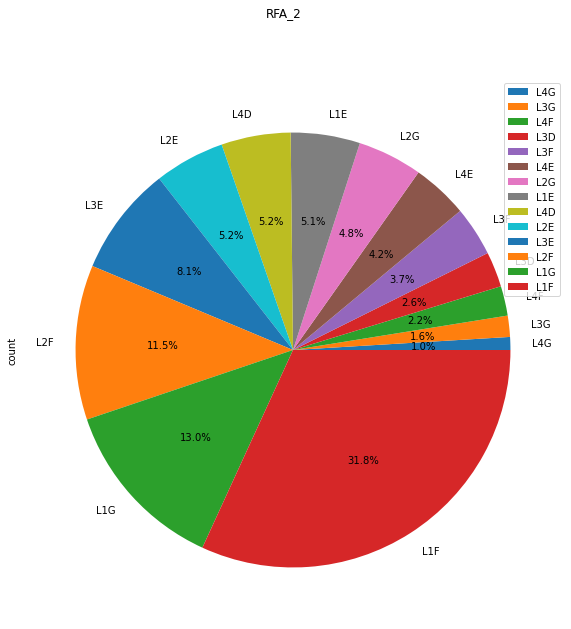

In [23]:
#Plots for RFA_2
RFA_2 = donors_correlation_drop["RFA_2"].value_counts(ascending=True)
RFA_2 = RFA_2.reset_index()
RFA_2 = RFA_2.rename({'index':'RFA_2','RFA_2':'count'}, axis='columns')

fig, ax2 = plt.subplots(figsize=(10, 10))
RFA_2.plot(kind='pie', x= "RFA_2", y = 'count', 
             title = 'RFA_2',
             legend = True,
             labels = RFA_2["RFA_2"],
             subplots=True,autopct='%1.1f%%',
             ax = ax2)

### 2. Data Pre Processing:

#### 2.1 Data Cleaning and Data transformation
*   1. Correct inconsistences in the data
*   2. Missing values
*   3. Smooth noise

**1.Correct inconsistences in the data**

<AxesSubplot:xlabel='CARDGIFT', ylabel='MAJOR'>

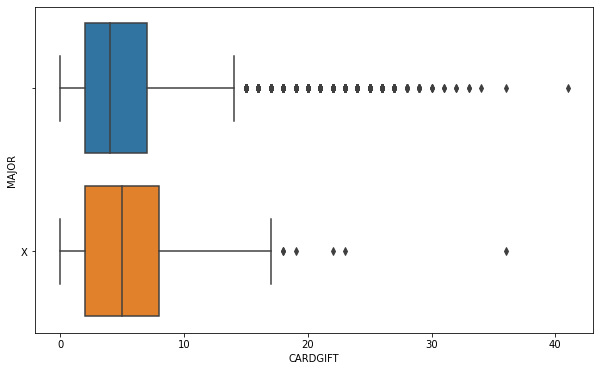

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="CARDGIFT", y="MAJOR", data=donors_correlation_drop)

<AxesSubplot:xlabel='AVGGIFT', ylabel='MAJOR'>

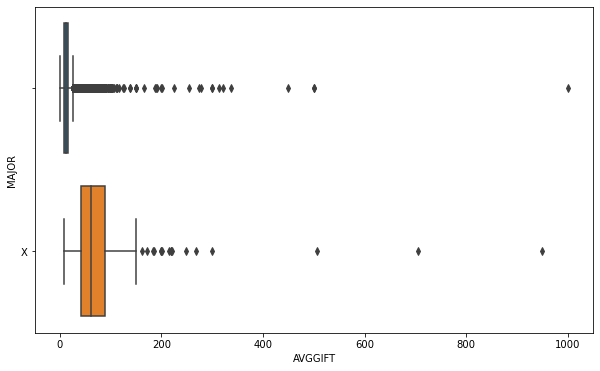

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="AVGGIFT", y="MAJOR", data=donors_correlation_drop)

<AxesSubplot:xlabel='HIT', ylabel='MAJOR'>

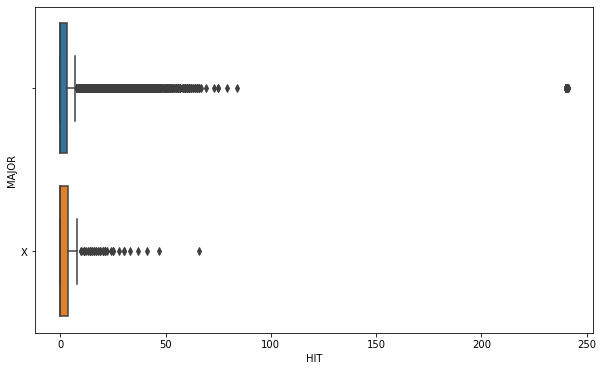

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x="HIT", y="MAJOR", data=donors_correlation_drop)

<AxesSubplot:xlabel='TIMELAG', ylabel='MAJOR'>

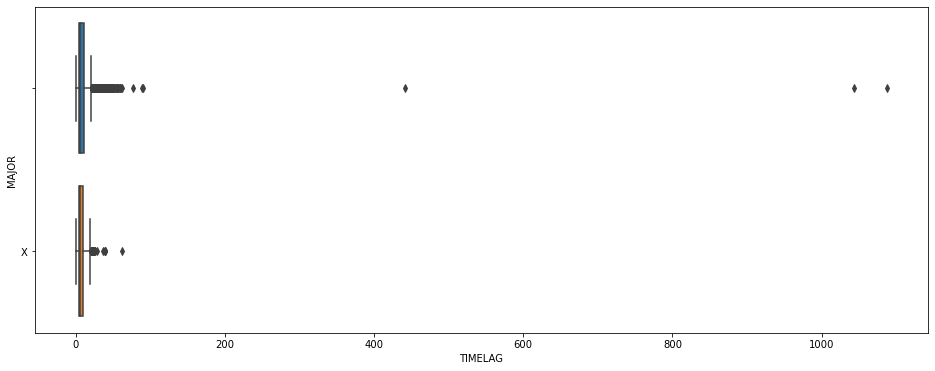

In [27]:
plt.figure(figsize=(16,6))
sns.boxplot(x="TIMELAG", y="MAJOR", data=donors_correlation_drop)

<AxesSubplot:xlabel='AGE', ylabel='MAJOR'>

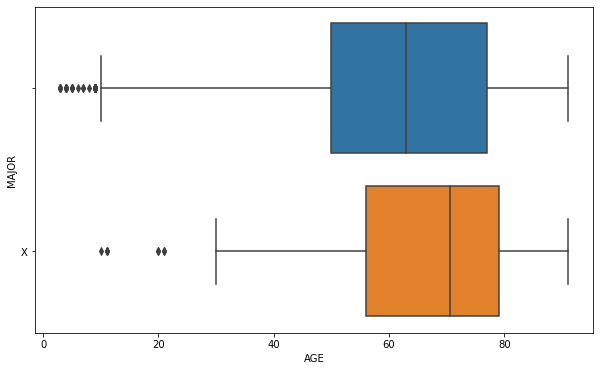

In [28]:
from datetime import date, timedelta
now = pd.Timestamp('now')
donors_correlation_drop['DOB'] = pd.to_datetime(donors_correlation_drop['DOB'], format='%Y-%m-%d')
donors_correlation_drop['DOB'] = donors_correlation_drop['DOB'].where(donors_correlation_drop['DOB'] < now, donors_correlation_drop['DOB'] -  np.timedelta64(100, 'Y'))
donors_correlation_drop['AGE'] = (now - donors_correlation_drop['DOB']).astype('<m8[Y]')  
plt.figure(figsize=(10,6))
sns.boxplot(x="AGE", y="MAJOR", data=donors_correlation_drop)

<AxesSubplot:xlabel='INCOME', ylabel='MAJOR'>

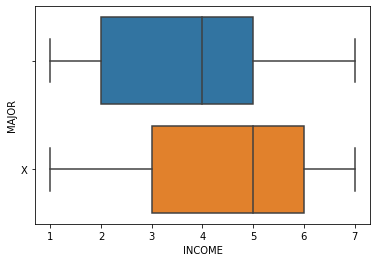

In [29]:
# BOX-PLOTS -------------------------------------------------------------------
sns.boxplot(x="INCOME", y="MAJOR", data=donors_correlation_drop)

In [30]:
donors_correlation_drop['FISTDATE'] = pd.to_datetime(donors_correlation_drop['FISTDATE'], format='%Y-%m-%d')
donors_correlation_drop['NEXTDATE'] = pd.to_datetime(donors_correlation_drop['NEXTDATE'], format='%Y-%m-%d')

In [31]:
donors_correlation_drop['DOB'] = donors_correlation_drop['DOB'].ffill()
donors_correlation_drop['FISTDATE'] = donors_correlation_drop['FISTDATE'].ffill()
donors_correlation_drop['NEXTDATE']= donors_correlation_drop['NEXTDATE'].ffill()

In [32]:
donors_correlation_drop["DOB"].isna().sum()

0

In [33]:
donors_correlation_drop['FISTDATE Year'] = donors_correlation_drop['FISTDATE'].dt.year
donors_correlation_drop['DOB Year'] = donors_correlation_drop['DOB'].dt.year
donors_correlation_drop['difference'] = donors_correlation_drop['FISTDATE Year'] - donors_correlation_drop['DOB Year']
#true=negativos

In [34]:
donors_correlation_drop['difference'] = donors_correlation_drop['difference']
donors_correlation_drop["Donors with donation beforn born:"]= donors_correlation_drop['difference'].apply(lambda x:True if x<0 else False)

In [35]:
donors_correlation_drop['difference'].groupby(donors_correlation_drop['Donors with donation beforn born:']).count()

Donors with donation beforn born:
False    95098
True       314
Name: difference, dtype: int64

In [36]:
donors_correlation_drop["DOB"].isna().sum()

0

Notes: We have 314 rows with clients that were born after their first donation (WRONG DATA!) That's why we are going to drop those rows.

In [37]:
donors_new = donors_correlation_drop.drop( donors_correlation_drop[(donors_correlation_drop['Donors with donation beforn born:'] == True)].index)

In [38]:
donors_new['difference'].groupby(donors_new['Donors with donation beforn born:']).count()

Donors with donation beforn born:
False    95098
Name: difference, dtype: int64

In [39]:
donors_drop_new = donors_new.drop(['difference', 'Donors with donation beforn born:', 'AGE','FISTDATE Year', 'DOB Year'], axis=1)

**2.Dealing with the missing values:**

Based on Panda profiling:

RDATE_3- RDATE_24 droping these columuns, because more than 90% data missing. 

WEALTH1, WEALTH2 same info like income, also more than 45% data missing

In [40]:
donors_remove_empty_str = donors_drop_new.replace(r'^\s*$', np.nan, regex=True)

In [41]:
donors_remove_empty_str["INCOME"].astype(float)
donors_remove_empty_str["INCOME"].fillna(donors_remove_empty_str["INCOME"].median(), inplace = True)
donors_remove_empty_str["INCOME"].isna().sum()

0

In [42]:
donors_remove_empty_str["TIMELAG"] = donors_remove_empty_str["TIMELAG"].fillna(value=donors_remove_empty_str["TIMELAG"].mean())
donors_remove_empty_str["TIMELAG"].isna().sum()

0

In [43]:
donors_remove_empty_str["ZIP"].head()

0    61081
1    91326
2    27017
3    95953
4    33176
Name: ZIP, dtype: object

In [44]:
donors_data_missing = donors_remove_empty_str.drop(['RDATE_3', 'RDATE_4', 'RDATE_5','RDATE_6', 'RDATE_7',
                                      'RDATE_8', 'RDATE_9', 'RDATE_10','RDATE_11', 'RDATE_12',
                                      'RDATE_13', 'RDATE_14', 'RDATE_15','RDATE_16', 'RDATE_17',
                                      'RDATE_18', 'RDATE_19', 'RDATE_20','RDATE_21', 'RDATE_22',
                                      'RDATE_23', 'RDATE_24',
                                       'WEALTH1','WEALTH2'], axis=1)
donors_data_missing.shape

(95098, 273)

In [45]:
profile_final = ProfileReport(donors_data_missing, correlations={'pearson': {'calculate': True},
                                                                'spearman': {'calculate': False},
                                                                'kendall': {'calculate': False},
                                                                'phi_k': {'calculate': False},
                                                                'cramers': {'calculate': False}}, minimal=True)
#profile_final.to_widgets()

In [46]:
donor_df_drop_01 = donors_data_missing.drop(['DOB', 'FISTDATE', 'NEXTDATE'], axis=1)

***Change Data type of variable from string to integer:***

In [47]:

cols = ['ZIP','HIT', 'DATASRCE', 'STATEGOV', 'FEDGOV','MALEVET', 'MALEMILI', 'WWIIVETS', 'VIETVETS', 'LOCALGOV',
        'ETH1', 'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11',
        'ETH12', 'ETH14', 'ETH15', 'ETH16',
        'HHAGE1', 'HHAGE2', 'HHN1','HHN2', 'MARR1', 'MARR2','MARR3', 'MARR4', 
        'VOC1','VOC2', 'VOC3', 'HC11','HC12', 'HC13', 'HC14','HC15', 'HC16', 'HC17',
        'HC19', 'HC20', 'HC21', 'MHUC1','MHUC2', 'HHP1',
       'DW1', 'DW3', 'DW4', 'DW7','DW9', 'HV1',
       'HV3', 'HU1', 'HU3', 'HU4','HU5', 'HHD4',
       'HHD5', 'HHD6', 'HHD8','HHD9', 'HHD10',
       'HHD12', 'ETHC1', 'ETHC2', 'ETHC3','ETHC6', 'HVP4', 'HVP5', 'HUR1',
       'DW8', 'HUR2', 'RHP4', 'HUPA1','HUPA3', 'HUPA4', 'HUPA5', 'HUPA7',
       'RP2', 'RP3', 'RP4', 'HHAS2','HHAS3', 'HHAS4', 'HVP5', 'MC1',
       'MC2', 'MC3', 'TPE1', 'TPE2','TPE3', 'TPE5', 'TPE6', 'TPE7', 'TPE8',
        'TPE9','PEC1','PEC2','LFC1',
       'LFC6','LFC7','LFC8','LFC9','LFC10',
       'OCC1','OCC2','OCC3','OCC4','OCC5','OCC6','OCC7','OCC8','OCC9','OCC10','OCC11','OCC12','OCC13',
       'EIC2','EIC3','EIC4','EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13',
       'VC4','ANC1','ANC2','ANC3','ANC4','ANC5','ANC6','ANC7','ANC8','ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15',
       'POBC1','POBC2','LSC1','LSC3','LSC4',
       'CARDPROM','NUMPRM12','CARDGIFT','CARDPM12',
       'EIC14','EIC15','EIC16','OEDC1','OEDC2','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7',
       'EC1','EC2','EC3','EC4','EC5','EC6','EC7',
        'SEC1','SEC2','SEC3','SEC4','SEC5',
        'AFC1','AFC3','AFC6','AFC5',
       'VC1','VC2','VC3','ANC15', 'CONTROLN']
donors_data_missing[cols] = donors_data_missing[cols].apply(pd.to_numeric, errors='coerce', axis=1)
donors_data_missing[cols].shape

(95098, 189)

In [48]:
donors_data_missing.columns[donors_data_missing.isna().any()].tolist()

['ZIP',
 'MAILCODE',
 'PVASTATE',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'DOMAIN',
 'HOMEOWNR',
 'GENDER',
 'DATASRCE',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'MSA',
 'ADI',
 'DMA',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24']

In [49]:
donors_data_missing["GENDER"].fillna("O", inplace = True)
donors_data_missing["MAJOR"].fillna("N", inplace = True)
donors_data_missing["HOMEOWNR"].fillna("O", inplace = True)
donors_data_missing["DATASRCE"].fillna(donors_data_missing['DATASRCE'].mean(), inplace=True)
donors_data_missing["ZIP"].fillna(donors_data_missing['ZIP'].mean(), inplace=True)
donors_data_missing["DOMAIN"].fillna("O0", inplace = True)
donors_data_missing["PVASTATE"].fillna("N", inplace = True)

Drop Empty values in data set, more than 80% empty

Drop RFA_3- RFA_24, RFA_2 giving info of lapsed donors also missing values in these variables

In [50]:
donor_df = donors_data_missing.drop(['MSA', 'ADI', 'DMA', 'AC1','AC2','MAILCODE',
                                     'RECINHSE','COLLECT1','RECP3',
                                     'BOATS','RECPGVG','PEPSTRFL','PCOWNERS','CARDS','LIFESRC','SOLP3'
                                     ,'SOLIH','PHOTO','PETS','HOMEE','CDPLAY','STEREO',
                                     'WALKER','CRAFTS','KIDSTUFF','PLATES','GARDENIN','FISHER',
                                     'VETERANS','BIBLE','CATLG','NOEXCH','RECSWEEP',
                                     'RFA_3','RFA_4','RFA_5','RFA_6','RFA_7','RFA_8','RFA_9','RFA_10',
                                     'RFA_11','RFA_12','RFA_13','RFA_14','RFA_15','RFA_16','RFA_17','RFA_18',
                                     'RFA_19','RFA_20','RFA_21','RFA_22','RFA_23','RFA_24', 
                                     'ETHC1','ETHC2','ETHC3','ETHC6','HPHONE_D'], axis=1)

In [51]:
donor_df.columns[donor_df.isna().any()].tolist()

[]

In [52]:
donor_df.shape

(95098, 213)

**3.Smooth the noise:**

Now we are going to do some box-plot's to check the noise of the data, in all the variables:

Base of last PVA donation 13-24 months. remove that data less than 2016

In [53]:
donor_df['LASTDATE'] = pd.to_datetime(donor_df['LASTDATE'], format='%Y-%m-%d')

In [54]:
donor_final_df = donor_df[donor_df['LASTDATE'].dt.year > 2015]

In [55]:
donors_cat_df = donor_final_df.select_dtypes(exclude=['int', 'float'])
donors_num_df = donor_final_df.select_dtypes(include=['int', 'float'])

In [56]:
print(donors_cat_df.shape, donors_num_df.shape)

(37822, 23) (37822, 190)


<AxesSubplot:xlabel='CARDGIFT', ylabel='MAJOR'>

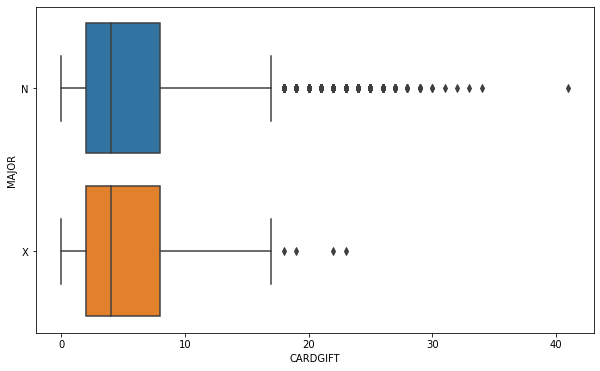

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x="CARDGIFT", y="MAJOR", data=donor_final_df)

<AxesSubplot:xlabel='AVGGIFT', ylabel='MAJOR'>

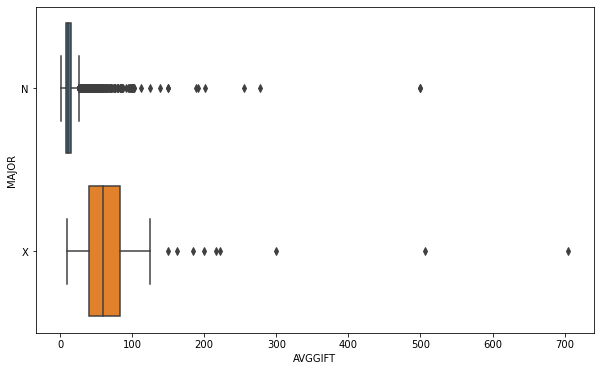

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x="AVGGIFT", y="MAJOR", data=donor_final_df)

<AxesSubplot:xlabel='HIT', ylabel='MAJOR'>

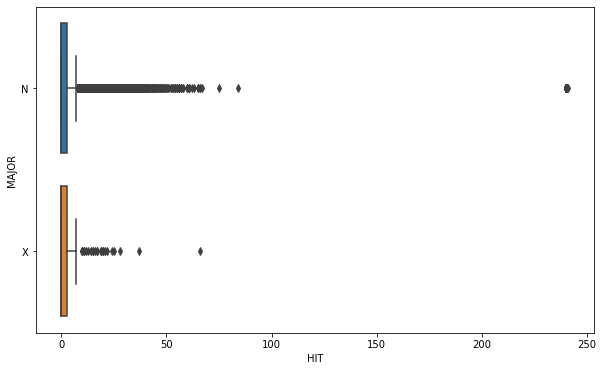

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x="HIT", y="MAJOR", data=donor_final_df)

***Z-Score-***

In [60]:
from scipy import stats
z = np.abs(stats.zscore(donors_num_df))
print(z)

[[1.34715725 0.53657705 5.69284538 ... 0.64362113 0.55394893 1.48251411]
 [0.13268881 1.14392158 0.35112401 ... 0.02658712 0.64027718 0.21212406]
 [0.33779125 0.07076747 1.26060116 ... 0.29637536 0.6931934  0.13857818]
 ...
 [0.66552436 0.07076747 0.35112401 ... 0.50526347 0.4247675  1.6449692 ]
 [1.17177391 1.89280105 0.35112401 ... 0.40081942 0.07376527 1.52396167]
 [1.55367461 0.678112   0.04892555 ... 0.19193131 7.62234781 1.56740281]]


Define a threshold to identify an outlier

In [61]:
threshold = 3
print(np.where(z > 3))

(array([    0,     0,     0, ..., 37821, 37821, 37821]), array([  2,   8,  11, ..., 185, 186, 188]))


In [62]:
donor_df_zo = donors_num_df[(z < 3).all(axis=1)]
donor_df_zo.shape

(11211, 190)

***IQR score -***

In [63]:
Q1 = donors_num_df.quantile(0.25)
Q3 = donors_num_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ZIP          40849.750000
INCOME           2.000000
HIT              3.000000
DATASRCE         1.000000
MALEMILI         0.000000
MALEVET         13.000000
VIETVETS        18.000000
WWIIVETS        22.000000
LOCALGOV         5.000000
STATEGOV         5.000000
FEDGOV           3.000000
ETH1            16.000000
                ...      
MHUC2            1.000000
CARDPROM        15.000000
CARDPM12         1.000000
NUMPRM12         2.000000
RAMNTALL        94.000000
CARDGIFT         6.000000
MINRAMNT         7.000000
MAXRAMNT         8.000000
LASTGIFT        10.000000
TIMELAG          6.000000
AVGGIFT          7.363636
CONTROLN    102214.250000
Length: 190, dtype: float64


In [64]:
print((donors_num_df < (Q1 - 1.5 * IQR)) | (donors_num_df > (Q3 + 1.5 * IQR)))

         ZIP  INCOME    HIT  DATASRCE  ...  LASTGIFT  TIMELAG  AVGGIFT  CONTROLN
4      False   False   True     False  ...     False    False    False     False
10     False   False  False     False  ...     False    False    False     False
12     False   False   True     False  ...     False    False    False     False
13     False   False  False     False  ...     False    False    False     False
20     False   False   True     False  ...     False    False    False     False
31     False   False  False     False  ...     False    False    False     False
41     False   False  False     False  ...     False    False    False     False
42     False   False  False     False  ...     False    False    False     False
44     False   False   True     False  ...     False    False    False     False
...      ...     ...    ...       ...  ...       ...      ...      ...       ...
95398  False   False  False     False  ...     False    False    False     False
95399  False   False  False 

In [65]:
donor_df_out = donors_num_df[~((donors_num_df < (Q1 - 1.5 * IQR)) |(donors_num_df > (Q3 + 1.5 * IQR))).any(axis=1)]
donor_df_out.shape

(86, 190)

**Feature Selection**

**PCA:**

Standardize the Data:

PCA is effected by scale

****StandardScaler****

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [67]:
ancestry_df =  donors_num_df[['ANC1','ANC2','ANC3','ANC4','ANC5','ANC6','ANC7',
                              'ANC8','ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15',
                             'ETH1', 'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11',
        'ETH12', 'ETH14', 'ETH15', 'ETH16',]]

In [68]:
employed_df = donors_num_df[['FEDGOV','STATEGOV','LOCALGOV','LFC1',
       'LFC6','LFC7','LFC8','LFC9','LFC10',
       'OCC1','OCC2','OCC3','OCC4','OCC5','OCC6','OCC7','OCC8','OCC9','OCC10','OCC11','OCC12','OCC13',
       'EIC2','EIC3','EIC4','EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15','EIC16',
                             'OEDC1','OEDC2','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7']]

In [69]:
# Standardizing the features
ancestry_x = StandardScaler().fit_transform(ancestry_df)

fit our standardized data using PCA

In [70]:
ancestry_pca = PCA()
ancestry_pca.fit(ancestry_x)

PCA()

In [71]:
ancestry_pca.explained_variance_ratio_

array([0.13303369, 0.07974941, 0.06783837, 0.05512862, 0.05336556,
       0.04284501, 0.03630309, 0.03477069, 0.03397418, 0.03351886,
       0.03259611, 0.0318039 , 0.03102298, 0.02841967, 0.02817896,
       0.02724432, 0.02647984, 0.02509768, 0.02391892, 0.0236128 ,
       0.02320011, 0.02258511, 0.02117286, 0.02087991, 0.02015594,
       0.01550446, 0.01389261, 0.00954711, 0.00354839, 0.00061084])

Text(0, 0.5, 'Cumulative Explained Variance')

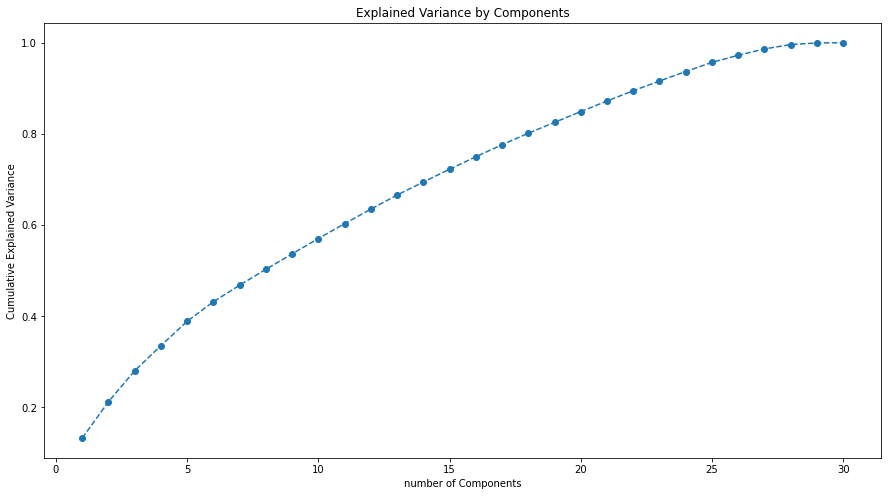

In [72]:
plt.figure(figsize=(15,8))
plt.plot(range(1,31), ancestry_pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.title("Explained Variance by Components")
plt.xlabel("number of Components")
plt.ylabel("Cumulative Explained Variance")

In [73]:
# Standardizing the features
employed_x = StandardScaler().fit_transform(employed_df)

In [74]:
employed_pca = PCA()
employed_pca.fit(employed_x)

PCA()

In [75]:
employed_pca.explained_variance_ratio_

array([1.20033732e-01, 8.62161688e-02, 6.90312097e-02, 5.64057095e-02,
       4.56884143e-02, 4.28946153e-02, 4.10271600e-02, 3.48984039e-02,
       2.98410895e-02, 2.95372488e-02, 2.69676429e-02, 2.48070818e-02,
       2.41792105e-02, 2.29059588e-02, 2.23911933e-02, 2.14296566e-02,
       2.07287473e-02, 2.05976066e-02, 1.94898949e-02, 1.90696250e-02,
       1.79358085e-02, 1.75263721e-02, 1.69115985e-02, 1.61561839e-02,
       1.51509784e-02, 1.49675123e-02, 1.32833790e-02, 1.25305410e-02,
       1.16549572e-02, 1.02472512e-02, 1.01802207e-02, 9.60020700e-03,
       8.65311593e-03, 8.04951392e-03, 7.65234597e-03, 7.03371859e-03,
       5.55386672e-03, 5.05946123e-03, 4.22096080e-03, 3.40164371e-03,
       3.18609394e-03, 2.65418885e-03, 1.87349713e-04, 6.23608785e-05])

In [76]:
employed_pca

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

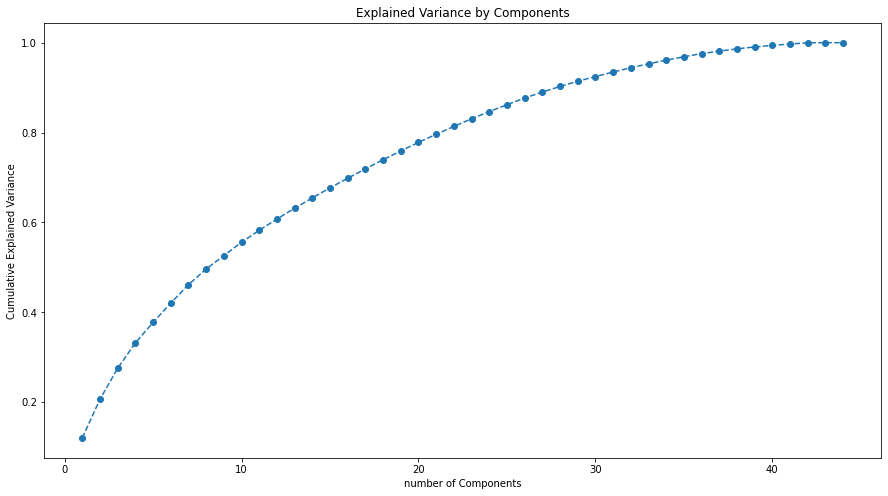

In [77]:
plt.figure(figsize=(15,8))
plt.plot(range(1,45), employed_pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.title("Explained Variance by Components")
plt.xlabel("number of Components")
plt.ylabel("Cumulative Explained Variance")

In [78]:
# Initialize
from pca import pca
# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 10 PCs
model = pca(n_components=10)
# Fit transform
out = model.fit_transform(donors_num_df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [190] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [79]:
pd.set_option('display.max_rows',500)
# Standardizing the features
donors = StandardScaler().fit_transform(donors_num_df)
# Initialize
model1 = pca()
# Fit transform
out1 = model1.fit_transform(donors_num_df)
print(out1['topfeat'])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [190] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
        PC   feature   loading  type
0      PC1  CONTROLN  0.964264  best
1      PC2       ZIP -0.964155  best
2      PC3       HV1  0.998593  best
3      PC4  RAMNTALL  0.991227  best
4      PC5      HHP1 -0.610900  best
5      PC6      HC19 -0.420510  best
6      PC7      HC11  0.530282  best
7      PC8      LFC9  0.720831  best
8      PC9      LFC9 -0.540058  best
9     PC10      HC13 -0.380352  best
10    PC11      LFC8 -0.484812  best
11    PC12      LFC8 -0.703351  best
12    PC13       HU5 -0.241411  best
13    PC

In [80]:
print(out['topfeat'])

       PC   feature   loading  type
0     PC1  CONTROLN  0.964264  best
1     PC2       ZIP -0.964155  best
2     PC3       HV1  0.998593  best
3     PC4  RAMNTALL  0.991227  best
4     PC5      HHP1 -0.610900  best
5     PC6      HC19 -0.420510  best
6     PC7      HC11  0.530282  best
7     PC8      LFC9  0.720831  best
8     PC9      LFC9 -0.540058  best
9    PC10      HC13 -0.380352  best
10   PC10    INCOME  0.004685  weak
11    PC8       HIT -0.013407  weak
12    PC7  DATASRCE  0.000611  weak
13    PC9  MALEMILI  0.013608  weak
14    PC8   MALEVET -0.085246  weak
15    PC5  VIETVETS -0.068291  weak
16    PC9  WWIIVETS -0.139067  weak
17    PC7  LOCALGOV  0.006290  weak
18   PC10  STATEGOV -0.013649  weak
19    PC9    FEDGOV  0.010059  weak
20    PC9      ETH1 -0.252973  weak
21    PC7      ETH2  0.107342  weak
22    PC6      ETH3  0.005472  weak
23    PC8      ETH4  0.028864  weak
24    PC9      ETH5  0.105739  weak
25    PC6      ETH6 -0.001893  weak
26    PC8      ETH7  0.00365

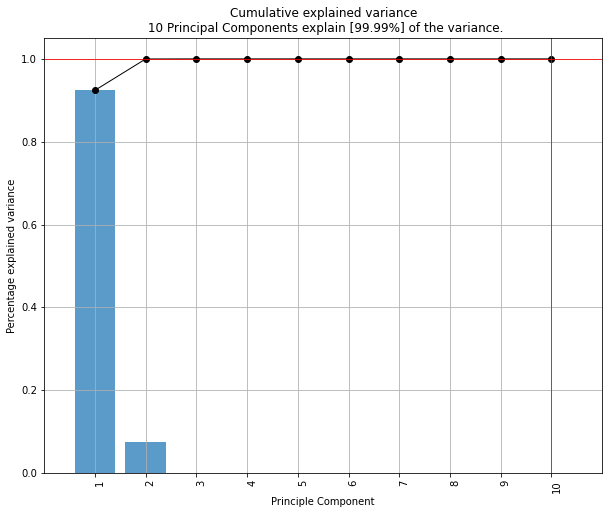

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 10 Principal Components explain [99.99%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [81]:
model.plot()

In [82]:
# Scatter first 10 PCs
#fig, ax = model.scatter()

# Make biplot with the number of features
#fig, ax = model.biplot(n_feat=4)

In [83]:
#ax = model.biplot3d(n_feat=10, legend=False)

<AxesSubplot:xlabel='TIMELAG', ylabel='MAJOR'>

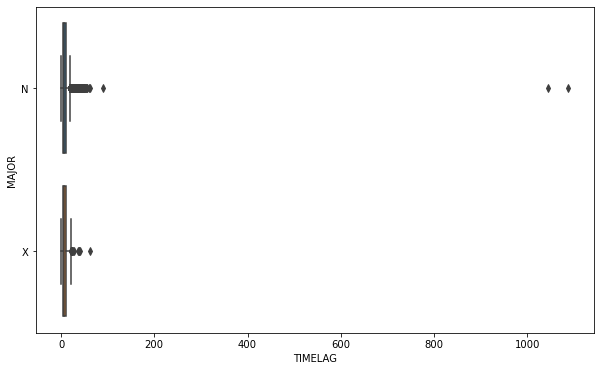

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(x="TIMELAG", y="MAJOR", data=donor_final_df)

<AxesSubplot:xlabel='CARDPROM', ylabel='MAJOR'>

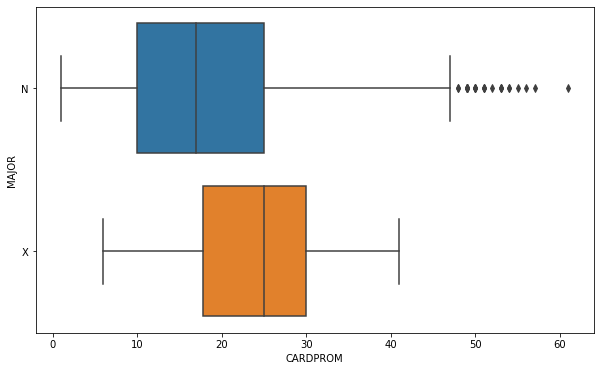

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x="CARDPROM", y="MAJOR", data=donor_final_df)

<AxesSubplot:xlabel='MINRAMNT', ylabel='MAJOR'>

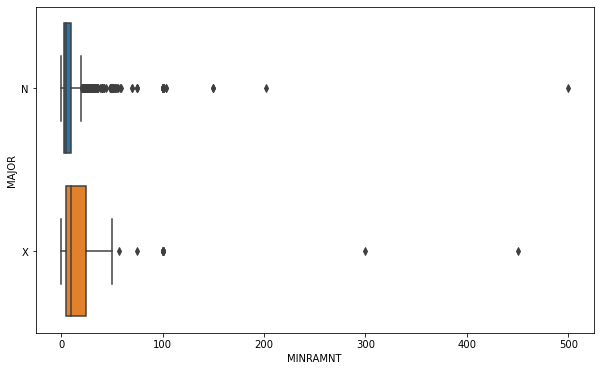

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(x="MINRAMNT", y="MAJOR", data=donor_final_df)

In [87]:
#plt.figure(figsize=(200,20))
#sns.boxplot(x="variable", y="value", data=pd.melt(donors_num_df))

In [88]:
donors_outlirs_df = donor_final_df[(donor_final_df['MINRAMNT'] < 400) & 
                                    (donor_final_df['TIMELAG'] < 1000) & 
                                    (donor_final_df['HIT'] < 200) &
                                   (donor_final_df['CARDGIFT'] < 40) &
                                   (donor_final_df['AVGGIFT'] < 500)]
donors_outlirs_df.shape

(37779, 213)

****PCA Features Importance:****

In [89]:
donors_pca_df = donors_outlirs_df.drop(['HC12','HC20','HC21',
                        'VOC2','LSC1','LSC4','VC3','SEC4','SEC5',
                        'OEDC1','OEDC3','OEDC4','OEDC5','OEDC6',
                        'EIC14','EIC3','EIC4','EIC8',
                        'OCC1','LFC6','MC1','MC2',
                        'HHAS4','RP4','HHD10','HHD12',
                        'HUPA3','HUPA4','HHD5',
                        'HHD5','DW4','DW7','DW9','MARR1','MARR2','MARR3','MARR4',
                       'HHN1','HHN2','HHAGE1','HHAGE2',
                        'ETH1','ETH2','ETH3','ETH5','ETH7','ETH9',
                       'WWIIVETS','LOCALGOV','STATEGOV','ETH10','ETH11','ETH15',
                                        'MDMAUD_R','MDMAUD_F','MDMAUD_A',], axis=1)
donors_pca_df.shape

(37779, 158)

#### 2.2. Data transformation

In [90]:
donors_pca_df['LASTDATE'].value_counts(dropna=False)

2016-01-01    11945
2016-02-01    11076
2016-03-01    10452
2017-02-01      818
2016-12-01      757
2017-01-01      743
2016-11-01      428
2016-10-01      404
2016-09-01      278
2016-05-01      213
2016-08-01      207
2016-04-01      169
2016-06-01      147
2016-07-01      142
Name: LASTDATE, dtype: int64

In [91]:
donors_pca_df['Last donation'] = 2018- donors_pca_df['LASTDATE'].dt.year

In [92]:
now = pd.Timestamp('now')
donors_pca_df['DOB'] = pd.to_datetime(donors_pca_df['DOB'], format='%Y-%m-%d')
donors_pca_df['DOB'] = donors_pca_df['DOB'].where(donors_pca_df['DOB'] < now, donors_pca_df['DOB'] -  np.timedelta64(100, 'Y'))
donors_pca_df['AGE'] = (now - donors_pca_df['DOB']).astype('<m8[Y]') 

In [93]:
#Let's divide the different types of variables:
data_complete = donors_pca_df[['Last donation',
                                   'TIMELAG', 
                                   'HIT',
                                   'AGE',
                                   'INCOME', 'AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT', 'STATE',
                                   'DOMAIN',
                                   'MDMAUD',
                                   'GENDER',
                                   'MAJOR',
                                   'HOMEOWNR',
                                   'RFA_2',
                                   'RFA_2R','CONTROLN']]
data_complete.to_csv("DM_Group_F_data_complete.csv", sep='\t' ,index=False)

numerical_df = donors_pca_df[['Last donation',
                                    'TIMELAG', 
                                   'HIT',
                                   'AGE',
                                   'INCOME']]
promotion_df = donors_pca_df[['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT']]
categorical_df = donors_pca_df[['STATE',
                                'DOMAIN',
                                'MDMAUD',
                                'GENDER',
                               'MAJOR',
                                'HOMEOWNR',
                                'RFA_2',
                               'RFA_2R']]


In [94]:
donors_ct_df = donors_pca_df.select_dtypes(exclude=['int', 'float'])
donors_n_df = donors_pca_df.select_dtypes(include=['int', 'float'])

In [95]:
donors_ct_df.head()

,ODATEDW,STATE,PVASTATE,DOB,MDMAUD,DOMAIN,HOMEOWNR,GENDER,MAJOR,EC8,RFA_2,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2F,RFA_2A,Last donation
4,2006-01-01,FL,N,1940-01-01,XXXX,S2,H,F,N,5,L2F,2017-02-01,2013-10-01,2016-01-01,2016-01-01,1999-03-01,2000-05-01,L,2,F,2
10,2016-01-01,KS,N,1952-11-01,XXXX,R3,U,F,N,2,L1F,2017-02-01,2016-02-01,2016-02-01,2016-02-01,2016-02-01,2014-04-01,L,1,F,2
12,2009-01-01,MN,N,1946-03-01,XXXX,R3,H,F,N,1,L4D,2017-02-01,2015-07-01,2011-02-01,2016-01-01,2009-05-01,2009-10-01,L,4,D,2
13,2012-01-01,LA,N,1946-03-01,XXXX,T2,O,M,N,4,L1G,2017-02-01,2012-11-01,2014-12-01,2016-12-01,2012-10-01,2012-11-01,L,1,G,2
20,2007-01-01,MN,N,1956-01-01,XXXX,S1,H,F,N,7,L3D,2017-02-01,2008-01-01,2014-04-01,2016-03-01,2007-01-01,2008-01-01,L,3,D,2


**3. CLUSTERING - VERSION 1**

#### 3.1.1 Numeric Clustering
In this chapter we are going to apply the following methods:

. Density-based methods

. Mean-Shift Clustering

. Hierarchical methods

. Partitioning methods (K-means)

. Expectation-Maximization (EM) Clustering

### 1. Density-Based Methods--DBSCAN

In [96]:
#NORMALIZATION- Just the scaled_engage
scaler = StandardScaler()
scaled_engage1 = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG', 
                                    'AGE',
                                   'HIT',
                                   'INCOME'])
#to scaled_engage
# The following bandwidth can be automatically detected using
my_bandwidth = estimate_bandwidth(scaled_engage1,quantile=0.2,n_samples=1000)

db_engage = DBSCAN(eps=my_bandwidth, min_samples=100).fit(scaled_engage1)
labels_engage = db_engage.labels_



# Number of clusters in labels, ignoring noise if present.
n_clusters_eng = len(set(labels_engage)) - (1 if -1 in labels_engage else 0)
n_noise_eng = list(labels_engage).count(-1)

unique_clusters, counts_clusters = np.unique(db_engage.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))


print('Estimated number of clusters: %d' % n_clusters_eng)
print('Estimated number of noise points: %d' % n_noise_eng)

[[   -1     0     1]
 [  103 36167  1509]]
Estimated number of clusters: 2
Estimated number of noise points: 103


### 2. Mean-Shift Clustering

In [97]:
#NORMALIZATION- Just the numeric variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_engage2 = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG',
                                    'AGE',
                                    'HIT',
                                    'INCOME'])

# Compute clustering with MeanShift
ms_engage = MeanShift(bandwidth=my_bandwidth,
               #bandwidth=0.15,
               bin_seeding=True)
ms_engage.fit(scaled_engage2)
labels_engage = ms_engage.labels_
cluster_centers = ms_engage.cluster_centers_
labels_unique = np.unique(labels_engage)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

#Values
#final.inverse_transform(X=cluster_centers)

#Count
unique, counts = np.unique(labels_engage, return_counts=True)

print(np.asarray((unique, counts)).T)

number of estimated clusters : 13
[[    0 35333]
 [    1  1493]
 [    2   442]
 [    3   312]
 [    4    60]
 [    5    41]
 [    6     1]
 [    7    19]
 [    8    46]
 [    9     3]
 [   10     3]
 [   11    22]
 [   12     4]]


### 3. Hierarchical methods

### AVERAGE

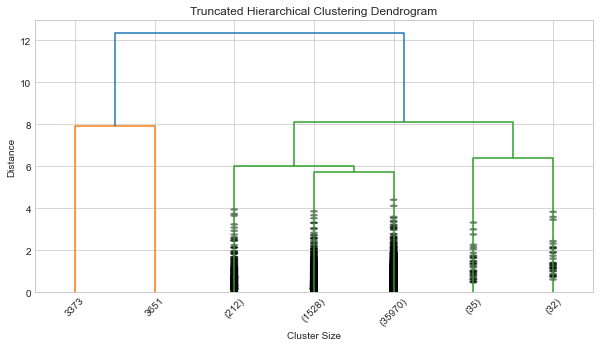

In [98]:
#NORMALIZATION- Just the scaled_engage
scaler = StandardScaler()
scaled_engage_h = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG', 
                                    'AGE',
                                    'HIT',
                                    'INCOME'])

#dendogram
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')

engage_dendr = linkage(scaled_engage_h, method = 'average')
dendrogram(engage_dendr,
           #truncate_mode='none',
           truncate_mode='lastp',
           p=7, 
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=150)
plt.show()

In [99]:
Hclustering = AgglomerativeClustering(n_clusters=4,
                                      affinity='euclidean',
                                      linkage='average')
my_HC = Hclustering.fit(scaled_engage_h)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Labels']

average = pd.concat([pd.DataFrame(scaled_engage_h), my_labels], axis=1)
average.columns =  ['Last donation',
                    'TIMELAG',
                    'AGE',
                    'HIT',
                    'INCOME','Labels']

average.Labels.value_counts()

2    37710
0       67
3        1
1        1
Name: Labels, dtype: int64

**COMPLETE**

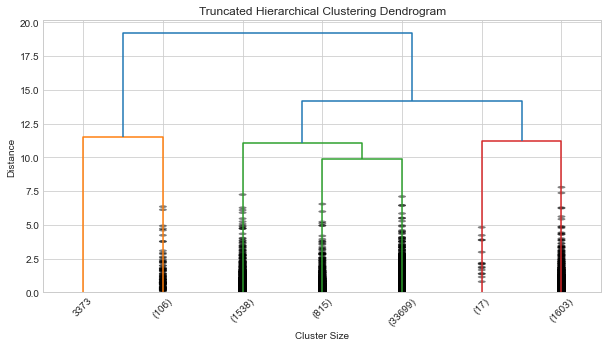

In [100]:
#NORMALIZATION- Just the scaled_engage
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_engage_h2 = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG', 
                                    'AGE',
                                    'HIT',
                                    'INCOME'])


#dendogram
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')

engage_dendr = linkage(scaled_engage_h2, method = 'complete')
dendrogram(engage_dendr,
           #truncate_mode='none',
           truncate_mode='lastp',
           p=7, 
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=150)
plt.show()

In [101]:
Hclustering = AgglomerativeClustering(n_clusters=4,
                                      affinity='euclidean',
                                      linkage='complete')
my_HC = Hclustering.fit(scaled_engage_h2)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Labels']

complete = pd.concat([pd.DataFrame(scaled_engage_h2), my_labels], axis=1)
complete.columns =  ['Last donation',
                     'TIMELAG',
                     'AGE',
                     'HIT',
                     'INCOME','Labels']

complete.Labels.value_counts() 

2    36052
0     1620
1      106
3        1
Name: Labels, dtype: int64

**WARD**

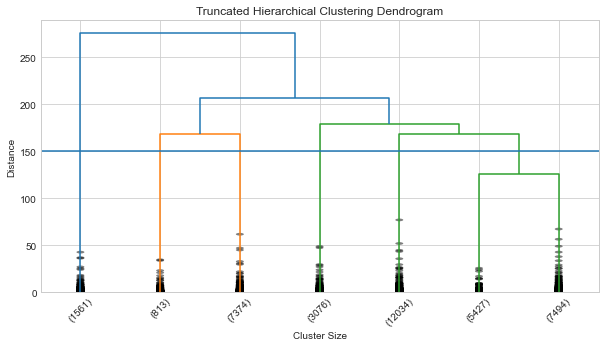

In [102]:
#NORMALIZATION- Just the scaled_engage
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_engage_h3 = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG', 
                                    'AGE',
                                    'HIT',
                                    'INCOME'])

#BUILDING THE DENDROGRAM
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')

ward_dendr = linkage(scaled_engage_h3, method = 'ward')
dendrogram(ward_dendr,
           #truncate_mode='none',
           truncate_mode='lastp',
           p=7, 
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=150)
plt.show()

In [103]:
Hclustering = AgglomerativeClustering(n_clusters=4,
                                      affinity='euclidean',
                                      linkage='ward')
my_HC = Hclustering.fit(scaled_engage_h3)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Labels']

ward_engage = pd.concat([pd.DataFrame(scaled_engage_h3), my_labels], axis=1)
ward_engage.columns =  ['Last donation',
                        'TIMELAG',
                        'AGE',
                        'HIT',
                        'INCOME','Labels']

ward_engage.Labels.value_counts() 

2    24955
0     8187
1     3076
3     1561
Name: Labels, dtype: int64

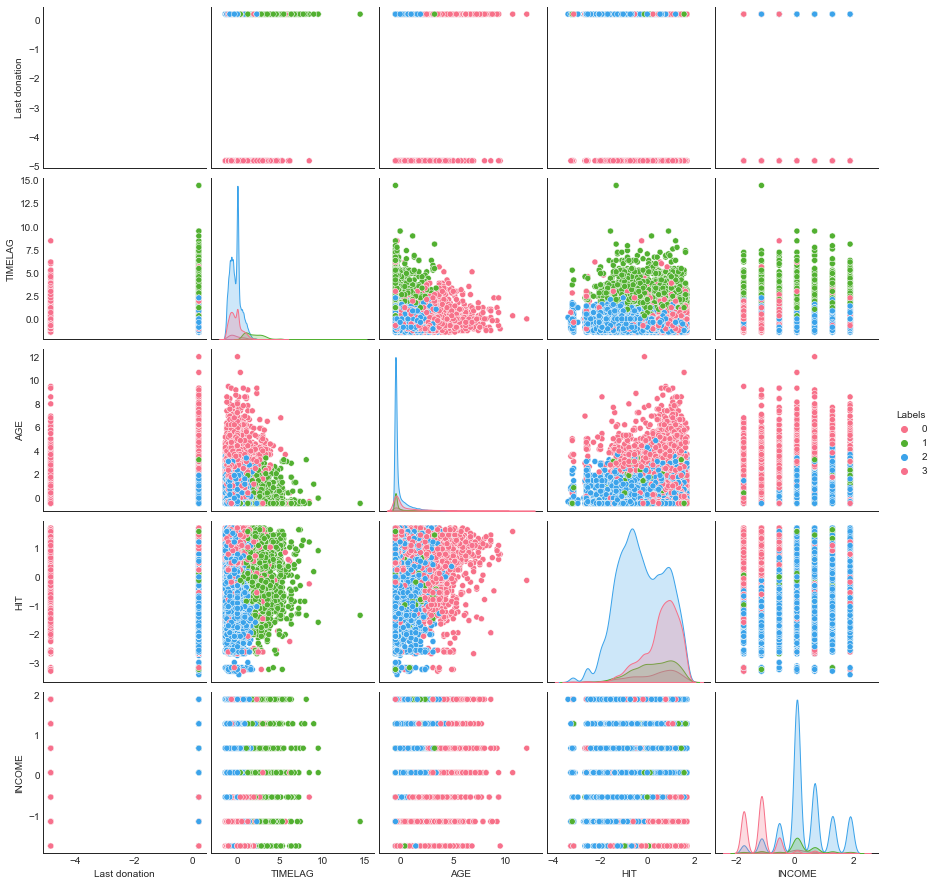

In [104]:
#the plot
sb.set_style("ticks") 
sb.pairplot(ward_engage,hue='Labels',diag_kind="kde",kind="scatter",palette="husl") 
plt.show() 

### 4. Partitioning methods (K-means)

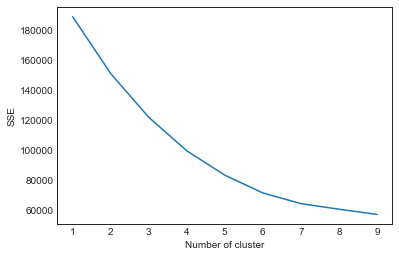

In [105]:
scaler = StandardScaler()
scaled_engage = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG',
                                    'AGE',
                                    'HIT',
                                    'INCOME'])

# K_MEANS for Numerical_engage:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(scaled_engage)
    #scaled_engage['clusters'] = kmeans.labels_
    #print(lob_final['clusters'])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [106]:
kmeans_engage = KMeans(n_clusters=5, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(scaled_engage)
#Check the clusters
kmeans_engage_centers = pd.DataFrame(kmeans_engage.cluster_centers_, 
                           columns=['Last donation',
                                    'TIMELAG', 
                                    'AGE',
                                    'HIT',
                                    'INCOME'])
kmeans_engage_centers
kmeans_engage_labels = pd.DataFrame(kmeans_engage.labels_)

#wich cluster it's each individual
scaled_engage.insert((scaled_engage.shape[1]),'k_means labels',kmeans_engage_labels)

In [107]:
#the number of individuals for each cluster
count = scaled_engage['k_means labels'].value_counts(ascending=True)
count

1     1550
3     2828
2     3706
0    14776
4    14919
Name: k_means labels, dtype: int64

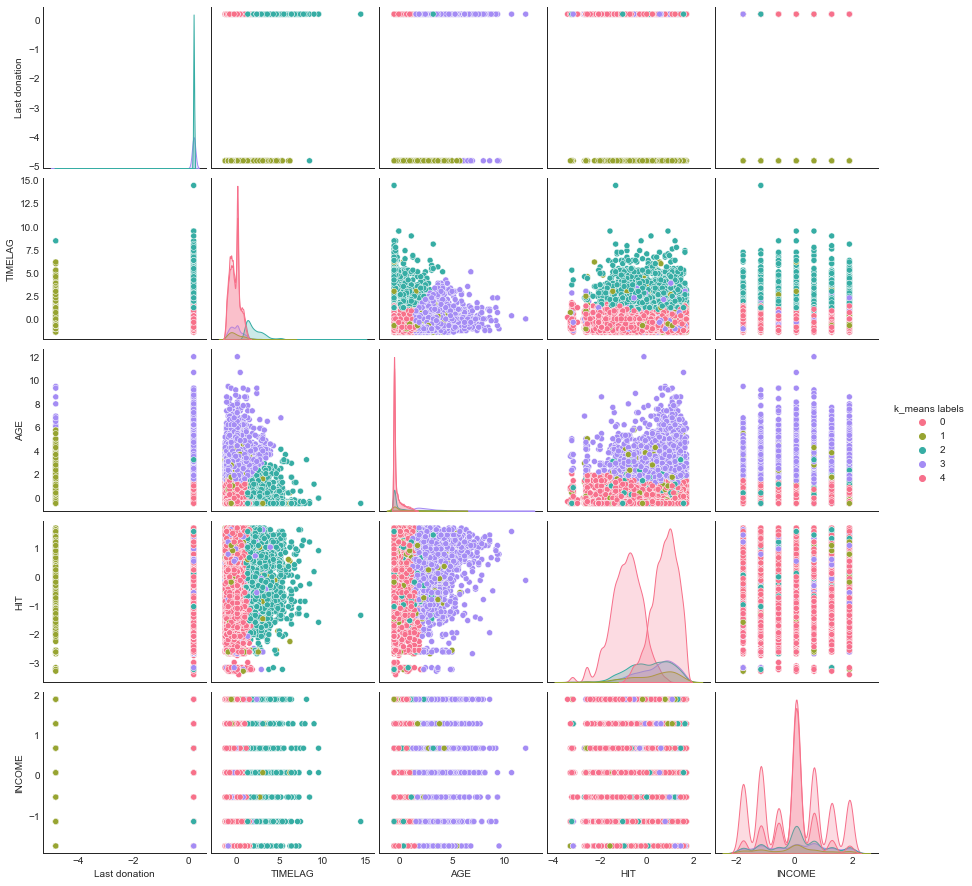

In [108]:
#Plot the clusters obtained using kmeans_engage
import seaborn as sb 
from matplotlib import pyplot as plt 

sb.set_style("ticks") 
sb.pairplot(scaled_engage,hue='k_means labels',diag_kind="kde",kind="scatter",palette="husl") 
plt.show() 

#### 5. Expectation-Maximization (EM) Clustering

In [109]:
#NORMALIZATION- Just the numeric variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_engage_EM = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG', 
                                    'AGE',
                                    'HIT',
                                    'INCOME'])
scaled_promotion_EM = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])

gmm = mixture.GaussianMixture(n_components=4,
                              covariance_type='full',
                              init_params='kmeans',
                              max_iter=1000,
                              n_init=10)

gmm.fit(scaled_engage_EM)

EM_labels_ = gmm.predict(scaled_engage_EM)
#Elbow
EM_score_ = gmm.score(scaled_engage_EM)
#Individual
EM_score_samp = gmm.score_samples(scaled_engage_EM)
#Individual
EM_pred_prob = gmm.predict_proba(scaled_engage_EM)

In [110]:
scaled_engage_EM.insert((scaled_engage_EM.shape[1]),'EM labels', EM_labels_)
count = scaled_engage_EM['EM labels'].value_counts(ascending=True)

In [111]:
unique_clusters, counts_clusters = np.unique(EM_labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)).T)

[[    0 11079]
 [    1  4412]
 [    2  1561]
 [    3 20727]]


In [112]:
#Check the distribution
gmm.weights_
gmm.means_

array([[ 2.07605674e-01, -2.30046493e-01,  1.06026880e-01,
         1.41525759e-03,  3.13174766e-02],
       [ 2.07605674e-01,  7.07093752e-01,  1.83367442e+00,
         2.49755561e-01,  1.65846138e-02],
       [-4.81682403e+00,  3.78450045e-02,  1.19640093e-01,
         2.57671213e-01, -3.27321160e-02],
       [ 2.07605674e-01, -4.52752818e-02, -4.84518471e-01,
        -7.74175728e-02, -1.76249569e-02]])

### 3.1.2 Categoric

#### K-modes

In [113]:
#K_MODES for categorical engage variables:

#first it's needed to do the following commands:

!pip install kmodes
!pip install --upgrade kmodes

from kmodes.kmodes import KModes

kmodes = KModes(n_clusters=5, 
            init='Huang', 
            n_init=10, 
            verbose=1)

kmodes_labels = kmodes.fit_predict(categorical_df)

Requirement already up-to-date: kmodes in ./opt/anaconda3/lib/python3.8/site-packages (0.10.2)
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 540, cost: 101852.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1675, cost: 102411.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8500, cost: 99053.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12844, cost: 103920.0
Run 4, iteration: 2/100, moves: 2708, cost: 102697.0
Run 4, iteration: 3/100, moves: 238, cost: 102697.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4890, cost: 104464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 7476, cost: 101967.0
Ini

In [114]:
categorical_df.insert((categorical_df.shape[1]),'k_modes labels',kmodes_labels)
#the number of individuals for each cluster
count = categorical_df['k_modes labels'].value_counts(ascending=True)
count

4    2245
2    8201
1    8746
3    9287
0    9300
Name: k_modes labels, dtype: int64

In [115]:
# Print the cluster centroids
print(kmodes.cluster_centroids_)

[['CA' 'R2' 'XXXX' 'M' 'N' 'O' 'L3E' 'L']
 ['CA' 'T2' 'XXXX' 'F' 'N' 'O' 'L2F' 'L']
 ['FL' 'T2' 'XXXX' 'M' 'N' 'H' 'L1F' 'L']
 ['CA' 'S1' 'XXXX' 'F' 'N' 'H' 'L1F' 'L']
 ['CA' 'S1' 'XXXX' 'M' 'N' 'H' 'L4E' 'L']]


## 3.2. clustering - VERSION 2

In [116]:
!pip install kmodes
!pip install --upgrade kmodes
from kmodes.kprototypes import KPrototypes


centroids_k_pro =[]
cost_kproto = []

for clusters in range(1,4):
    
    kprotodf = donors_pca_df[['Last donation',
                                     'TIMELAG', 
                                     'HIT',
                                     'AGE',
                                     'INCOME',
                                     'STATE',
                                     'DOMAIN',
                                     'MDMAUD',
                                     'GENDER',
                                     'MAJOR',
                                     'HOMEOWNR',
                                     'RFA_2',
                                     'RFA_2R']] 
    
    #convert to np array as kproto doesn't take DF's
    ar_kproto = kprotodf.values
    
    kproto = KPrototypes(n_clusters=clusters, init='Huang', verbose=1)
    labels = kproto.fit_predict(ar_kproto, categorical=[5, 6, 7, 8, 9, 10, 11, 12])
    
    centroids_k_pro.append(kproto.cluster_centroids_)
    print(kproto.cluster_centroids_)
    print(kproto.cost_)
    print(kproto.n_iter_)
    print(labels)
    cost_kproto.append(kproto.cost_)

Requirement already up-to-date: kmodes in ./opt/anaconda3/lib/python3.8/site-packages (0.10.2)
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 15007918.893694164
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 15007918.893694164
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 15007918.893694164
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 15007918.893694164
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 15007918.893694164
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 15007918.893694164
Init: initializing centroids
Init: initializing clust

Run: 1, iteration: 5/100, moves: 123, ncost: 6106802.39454067
Run: 1, iteration: 6/100, moves: 63, ncost: 6106753.267265718
Run: 1, iteration: 7/100, moves: 59, ncost: 6106690.14934109
Run: 1, iteration: 8/100, moves: 163, ncost: 6106026.475418916
Run: 1, iteration: 9/100, moves: 790, ncost: 6097669.517828531
Run: 1, iteration: 10/100, moves: 336, ncost: 6096383.496511462
Run: 1, iteration: 11/100, moves: 42, ncost: 6096362.631777892
Run: 1, iteration: 12/100, moves: 15, ncost: 6096357.645049281
Run: 1, iteration: 13/100, moves: 10, ncost: 6096356.486749466
Run: 1, iteration: 14/100, moves: 1, ncost: 6096356.469162478
Run: 1, iteration: 15/100, moves: 0, ncost: 6096356.469162478
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 7061, ncost: 6525444.233884081
Run: 2, iteration: 2/100, moves: 4535, ncost: 6288466.135923548
Run: 2, iteration: 3/100, moves: 2576, ncost: 6192330.797923262
Run: 2, iteration: 4/100, moves: 1928, n

Starting iterations...
Run: 10, iteration: 1/100, moves: 6714, ncost: 6368834.597591808
Run: 10, iteration: 2/100, moves: 3576, ncost: 6226635.6646995
Run: 10, iteration: 3/100, moves: 2236, ncost: 6174940.593528344
Run: 10, iteration: 4/100, moves: 1745, ncost: 6144541.007849012
Run: 10, iteration: 5/100, moves: 1207, ncost: 6125092.261843796
Run: 10, iteration: 6/100, moves: 709, ncost: 6119440.833453281
Run: 10, iteration: 7/100, moves: 882, ncost: 6109175.24852654
Run: 10, iteration: 8/100, moves: 438, ncost: 6106928.5869004475
Run: 10, iteration: 9/100, moves: 105, ncost: 6106795.615029214
Run: 10, iteration: 10/100, moves: 55, ncost: 6106753.267265719
Run: 10, iteration: 11/100, moves: 59, ncost: 6106690.149341088
Run: 10, iteration: 12/100, moves: 163, ncost: 6106026.475418915
Run: 10, iteration: 13/100, moves: 790, ncost: 6097669.517828532
Run: 10, iteration: 14/100, moves: 336, ncost: 6096383.496511461
Run: 10, iteration: 15/100, moves: 42, ncost: 6096362.631777893
Run: 10, it

In [117]:
kprotodf.insert((kprotodf.shape[1]),'k_prototypes labels',labels)

#the number of individuals for each cluster
count = kprotodf['k_prototypes labels'].value_counts(ascending=True)
count

1     9233
2    12744
0    15802
Name: k_prototypes labels, dtype: int64

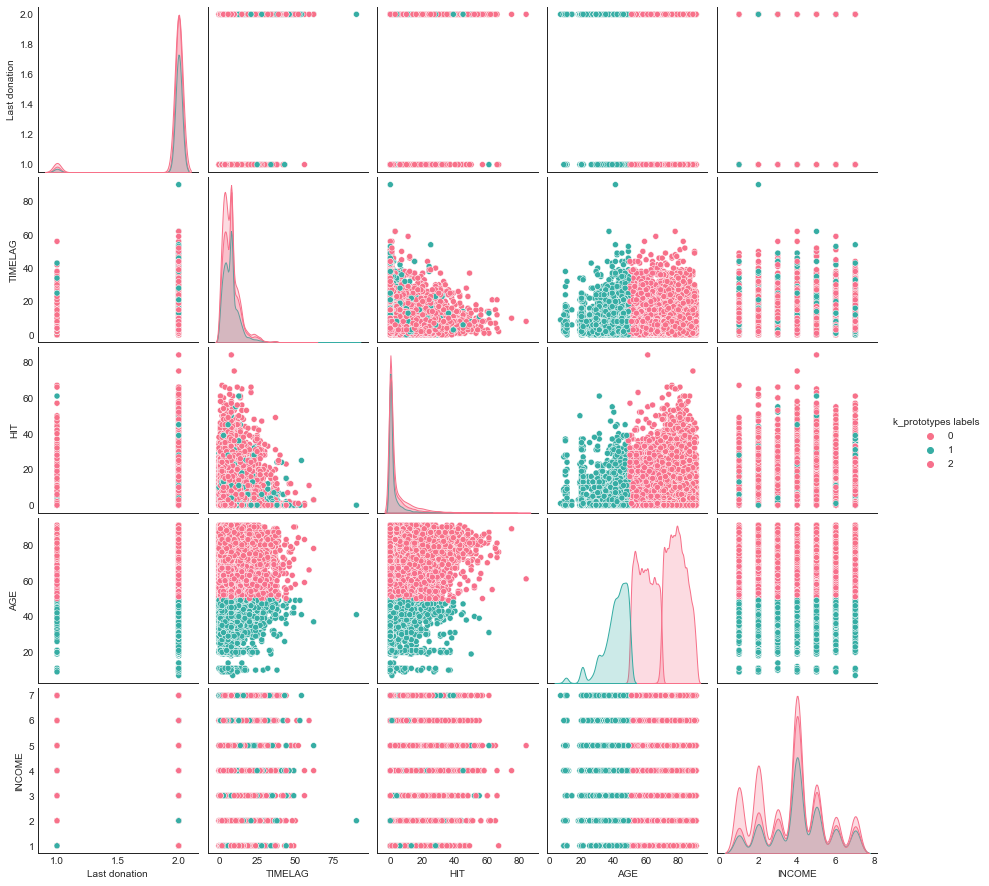

In [118]:
#plot
sb.set_style("ticks") 
sb.pairplot(kprotodf,hue='k_prototypes labels',kind="scatter",palette="husl")
plt.show() 

### 3.3. Promotion clustering

In this chapter we are going to apply the following methods:

. Density-based methods

. Mean-Shift Clustering

. Hierarchical methods

. Partitioning methods (K-means)

. Expectation-Maximization Clustering

### 1. Density-based methods

In [119]:
#NORMALIZATION- Just the numeric variables
scaler = StandardScaler()
scaled_lob1 = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])

#to scaled_lob
# The following bandwidth can be automatically detected using
my_bandwidth = estimate_bandwidth(scaled_lob1,quantile=0.2,n_samples=1000)

db_lob = DBSCAN(eps=my_bandwidth, min_samples=100).fit(scaled_lob1)
labels_lob = db_lob.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_lob)) - (1 if -1 in labels_lob else 0)
n_noise_ = list(labels_lob).count(-1)

unique_clusters, counts_clusters = np.unique(db_lob.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
scaled_lob1.insert((scaled_lob1.shape[1]),'Clusters',labels_lob)

[[   -1     0]
 [  249 37530]]
Estimated number of clusters: 1
Estimated number of noise points: 249


### 2. Mean-Shift Clustering

In [120]:
#NORMALIZATION- Just the numeric variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_lob2 = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])



# Compute clustering with MeanShift
ms_lob = MeanShift(bandwidth=my_bandwidth,
               #bandwidth=0.30,
               bin_seeding=True)
ms_lob.fit(scaled_lob2)
labels_lob = ms_lob.labels_
cluster_centers = ms_lob.cluster_centers_
labels_unique = np.unique(labels_lob)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

#Values
#final.inverse_transform(X=cluster_centers)

#Count
unique, counts = np.unique(labels_lob, return_counts=True)

print(np.asarray((unique, counts)).T)

number of estimated clusters : 34
[[    0 36106]
 [    1   190]
 [    2   608]
 [    3    34]
 [    4    28]
 [    5    15]
 [    6    35]
 [    7     9]
 [    8    13]
 [    9     8]
 [   10     3]
 [   11     4]
 [   12     2]
 [   13     2]
 [   14     2]
 [   15     2]
 [   16     3]
 [   17     2]
 [   18    14]
 [   19     1]
 [   20     1]
 [   21     1]
 [   22     1]
 [   23     1]
 [   24     1]
 [   25     1]
 [   26     1]
 [   27     1]
 [   28     2]
 [   29     1]
 [   30     2]
 [   31     2]
 [   32     1]
 [   33   682]]


### 3. Hierarchical methods

#### AVERAGE

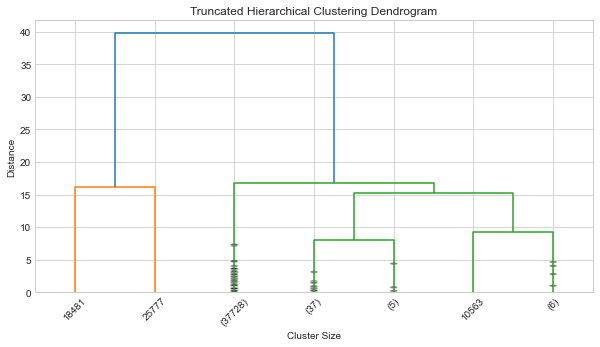

In [121]:
#NORMALIZATION- Just the numeric variables
scaler = StandardScaler()
scaled_lob_HM1 = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])

#BUILDING THE DENDROGRAM
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')

average_dendr = linkage(scaled_lob_HM1, method = 'average')
dendrogram(average_dendr,
           #truncate_mode='none',
           truncate_mode='lastp',
           p=7, 
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=150)
plt.show()

In [122]:
Hclustering = AgglomerativeClustering(n_clusters=3,
                                      affinity='euclidean',
                                      linkage='average')
my_HC = Hclustering.fit(scaled_lob_HM1)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Labels']

average = pd.concat([pd.DataFrame(scaled_lob_HM1), my_labels], axis=1)
average.columns =  ['AVGGIFT',
                    'CARDPROM',
                    'MINRAMNT',
                    'CARDGIFT','Labels']

average.Labels.value_counts() 

2    37728
1       49
0        2
Name: Labels, dtype: int64

#### COMPLETE

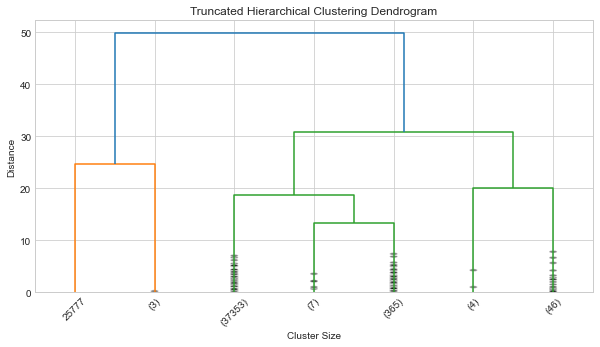

In [123]:
#NORMALIZATION
scaler = StandardScaler()
scaled_lob_HM2 = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])



#BUILDING THE DENDROGRAM
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
complete_dendr = linkage(scaled_lob_HM2, method = 'complete')
dendrogram(complete_dendr,
           #truncate_mode='none',
           truncate_mode='lastp',
           p=7, 
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=150)
plt.show()

In [124]:
Hclustering = AgglomerativeClustering(n_clusters=4,
                                      affinity='euclidean',
                                      linkage='complete')
my_HC = Hclustering.fit(scaled_lob_HM2)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Labels']

complete = pd.concat([pd.DataFrame(scaled_lob_HM2), my_labels], axis=1)
complete.columns =  ['AVGGIFT',
                     'CARDPROM',
                     'MINRAMNT',
                     'CARDGIFT','Labels']

complete.Labels.value_counts() 

2    37725
0       50
1        3
3        1
Name: Labels, dtype: int64

#### WARD

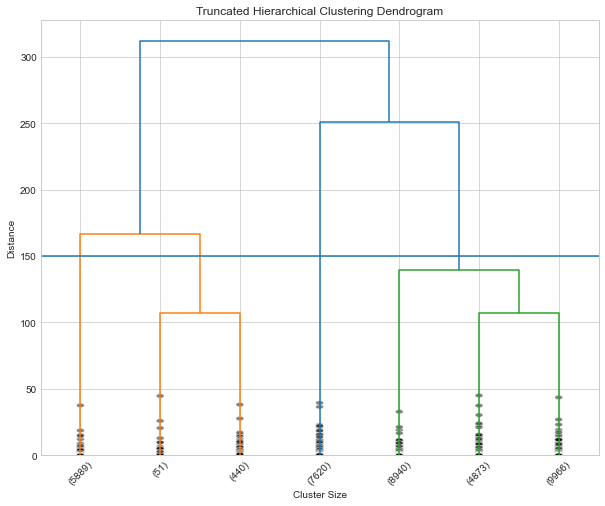

In [125]:
#NORMALIZATION
scaler = StandardScaler()
scaled_lob_HM3 = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])
#BUILDING THE DENDROGRAM
plt.figure(figsize=(10,8))
plt.style.use('seaborn-whitegrid')

ward_dendr = linkage(scaled_lob_HM3, method = 'ward')
dendrogram(ward_dendr,
           #truncate_mode='none',
           truncate_mode='lastp',
           p=7, 
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=150)
plt.show()

In [126]:
Hclustering = AgglomerativeClustering(n_clusters=3,
                                      affinity='euclidean',
                                      linkage='ward')
my_HC = Hclustering.fit(scaled_lob_HM3)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Labels']

ward_lob = pd.concat([pd.DataFrame(scaled_lob_HM3), my_labels], axis=1)
ward_lob.columns =  ['AVGGIFT',
                     'CARDPROM',
                     'MINRAMNT',
                     'CARDGIFT','Labels']


ward_lob.Labels.value_counts() 

1    23779
2     7620
0     6380
Name: Labels, dtype: int64

### 4. Partitioning methods (K-means)

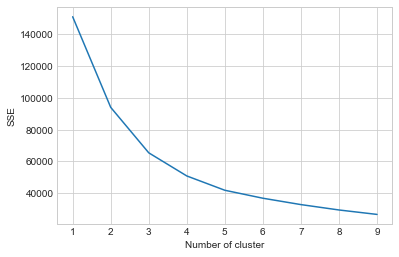

In [127]:
#NORMALIZATION
scaler = StandardScaler()
scaled_lob = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])
# dendogram:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(scaled_lob)
    #scaled_lob['clusters'] = kmeans.labels_
    #print(final_nom['clusters'])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [128]:
#by the plot above we decided to choose k=2
kmeans_lob = KMeans(n_clusters=2, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(scaled_lob)

In [129]:
#Check the clusters
kmeans_lob_centers = pd.DataFrame(kmeans_lob.cluster_centers_, 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])
#labels
kmeans_lob_labels = pd.DataFrame(kmeans_lob.labels_)

#labels associated to each individual
scaled_lob.insert((scaled_lob.shape[1]),'k_means labels', kmeans_lob_labels)
scaled_lob_kmeans = scaled_lob

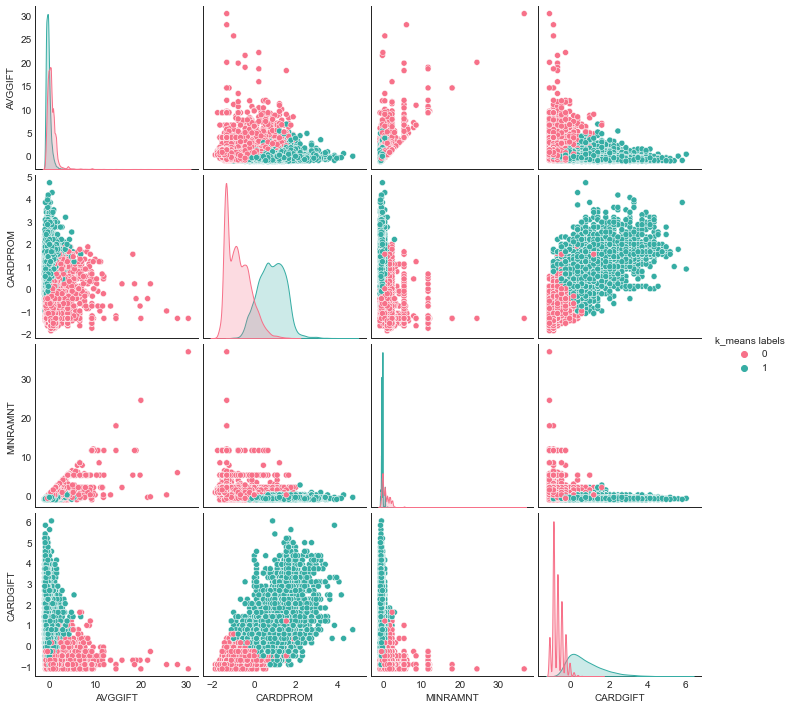

In [130]:
#the plot
sb.set_style("ticks") 
sb.pairplot(scaled_lob,hue='k_means labels',diag_kind="kde",kind="scatter",palette="husl") 
plt.show()

### 5. Expectation-Maximization Clustering

In [131]:
#NORMALIZATION- Just the numeric variables
scaler = StandardScaler()
scaled_lob_EM = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])
# to scaled_lob_EM
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2,
                              covariance_type='full',
                              init_params='kmeans',
                              max_iter=1000,
                              n_init=10)

gmm.fit(scaled_lob_EM)

GaussianMixture(max_iter=1000, n_components=2, n_init=10)

In [132]:
EM_labels_ = gmm.predict(scaled_lob_EM)
#Elbow
EM_score_ = gmm.score(scaled_lob_EM)
#Individual
EM_score_samp = gmm.score_samples(scaled_lob_EM)
#Individual
EM_pred_prob = gmm.predict_proba(scaled_lob_EM)
unique_clusters, counts_clusters = np.unique(EM_labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)).T)
#Check the distribution
gmm.weights_
gmm.means_

[[    0 24308]
 [    1 13471]]


array([[-0.43012655,  0.39027629, -0.48874599,  0.3972262 ],
       [ 0.69027657, -0.62632399,  0.78435034, -0.63747736]])

In [133]:
scaled_lob_EM.insert((scaled_lob_EM.shape[1]),'EM labels', EM_labels_)

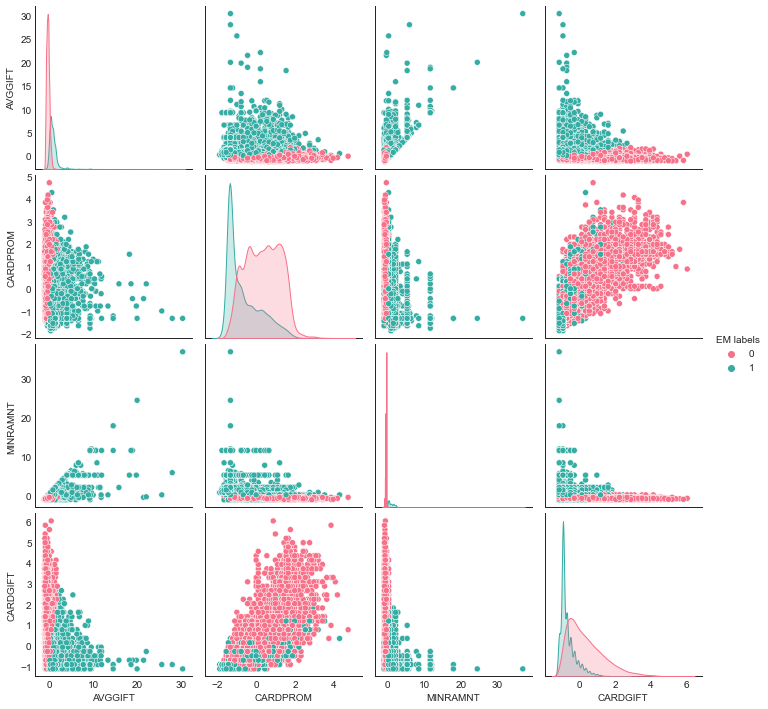

In [134]:
#the plot
sb.set_style("ticks") 
sb.pairplot(scaled_lob_EM,hue='EM labels',diag_kind="kde",kind="scatter",palette="husl") 
plt.show() 

### 4.1. Final Clustering for Donate and Promotion:

**Numeric clustering**

***WARD***

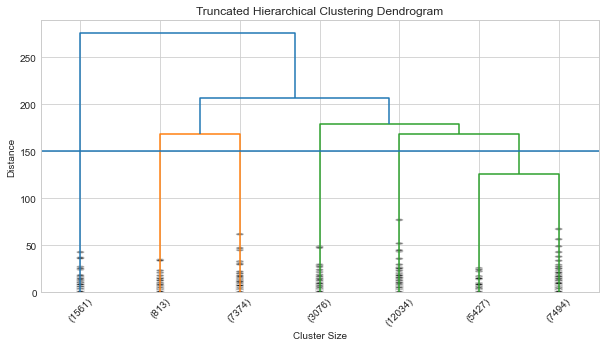

In [135]:
#NORMALIZATION- Just the scaled_engage
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_engage_h3 = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG', 
                                    'AGE',
                                    'HIT',
                                    'INCOME'])
#BUILDING THE DENDROGRAM
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')

ward_dendr = linkage(scaled_engage_h3, method = 'ward')
dendrogram(ward_dendr,
           #truncate_mode='none',
           truncate_mode='lastp',
           p=7, 
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=150)
plt.show()

In [136]:
Hclustering = AgglomerativeClustering(n_clusters=5,
                                      affinity='euclidean',
                                      linkage='ward')
my_HC = Hclustering.fit(scaled_engage_h3)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Donate Numeric labels']

ward_engage = pd.concat([pd.DataFrame(scaled_engage_h3), my_labels], axis=1)
ward_engage.columns =  ['Last donation',
                        'TIMELAG', 
                        'AGE',
                        'HIT',
                        'INCOME',
                        'Donate Numeric labels']

ward_engage['Donate Numeric labels'].value_counts() 

0    24955
2     7374
1     3076
3     1561
4      813
Name: Donate Numeric labels, dtype: int64

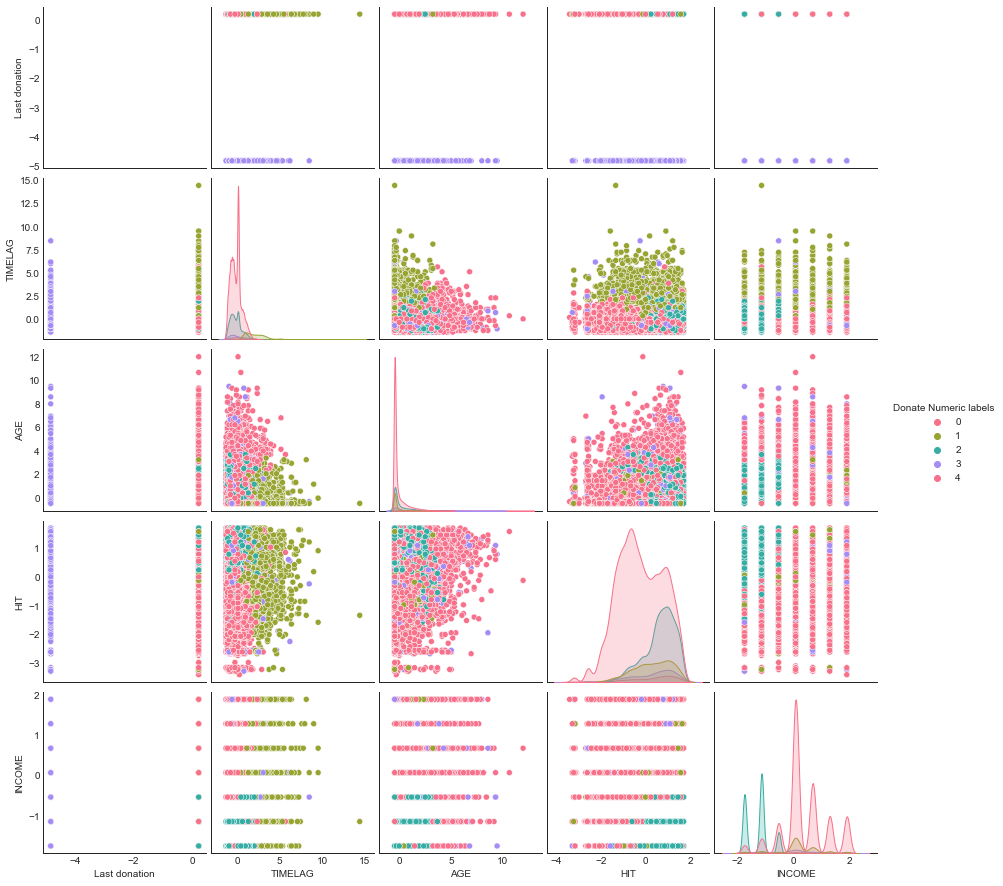

In [137]:
#the plot
sb.set_style("ticks") 
sb.pairplot(ward_engage,hue='Donate Numeric labels',diag_kind="kde",kind="scatter",palette="husl") 
plt.show() 

### Donate Categoric clustering:

K-MODES

In [138]:
categ_donate =donors_pca_df[['STATE',
                             'DOMAIN',
                             'MDMAUD',
                             'GENDER',
                             'MAJOR',
                             'HOMEOWNR',
                             'RFA_2',
                             'RFA_2R']]

In [139]:
#K_MODES for categorical engage variables:

#first it's needed to do the following commands:

!pip install kmodes
!pip install --upgrade kmodes

from kmodes.kmodes import KModes

kmodes = KModes(n_clusters=4, 
            init='Huang', 
            n_init=10, 
            verbose=1)

kmodes_labels = kmodes.fit_predict(categ_donate)

Requirement already up-to-date: kmodes in ./opt/anaconda3/lib/python3.8/site-packages (0.10.2)
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4427, cost: 105943.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5138, cost: 105639.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5809, cost: 112169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9425, cost: 102314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14006, cost: 102612.0
Run 5, iteration: 2/100, moves: 1174, cost: 102612.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2982, cost: 108904.0
Init: initializing centroids
Init: initializing clust

In [140]:
categ_donate.insert((categ_donate.shape[1]),'Donate categoric labels',kmodes_labels)
#the number of individuals for each cluster
count = categ_donate['Donate categoric labels'].value_counts(ascending=True)
count

2     6445
3     7533
0    10986
1    12815
Name: Donate categoric labels, dtype: int64

In [141]:
# Print the cluster centroids
print(kmodes.cluster_centroids_)

[['CA' 'R2' 'XXXX' 'F' 'N' 'U' 'L3E' 'L']
 ['CA' 'R2' 'XXXX' 'M' 'N' 'H' 'L1F' 'L']
 ['FL' 'T2' 'XXXX' 'F' 'N' 'O' 'L1F' 'L']
 ['CA' 'S1' 'XXXX' 'F' 'N' 'H' 'L1F' 'L']]


In [142]:
#bar plot
#sb.set_style("ticks") 
#sb.pairplot(categ_engage,hue='k_modes labels',diag_kind="kde",kind="scatter",palette="husl")
#sb.pairplot(donors_ct_df, hue='Donate categoric labels',kind="scatter",palette="husl")
#plt.show()

### Promotion Clustering Final

In [143]:
#NORMALIZATION
scaler = StandardScaler()
scaled_lob = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])

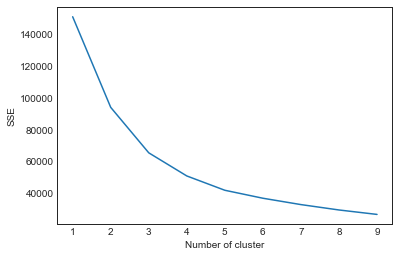

In [144]:
# dendogram:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(scaled_lob)
    #scaled_lob['clusters'] = kmeans.labels_
    #print(final_nom['clusters'])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [145]:
#by the plot above we decided to choose k=2
kmeans_lob = KMeans(n_clusters=4, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(scaled_lob)

In [146]:
#Check the clusters
kmeans_lob_centers = pd.DataFrame(kmeans_lob.cluster_centers_, 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])
#labels
kmeans_lob_labels = pd.DataFrame(kmeans_lob.labels_)

#labels associated to each individual
scaled_lob.insert((scaled_lob.shape[1]),'promotion labels', kmeans_lob_labels)

In [147]:
#the number of individuals for each cluster
count = scaled_lob['promotion labels'].value_counts(ascending=True)
count

2      346
3     6843
1    12081
0    18509
Name: promotion labels, dtype: int64

In [148]:
scaled_lob_kmeans = scaled_lob

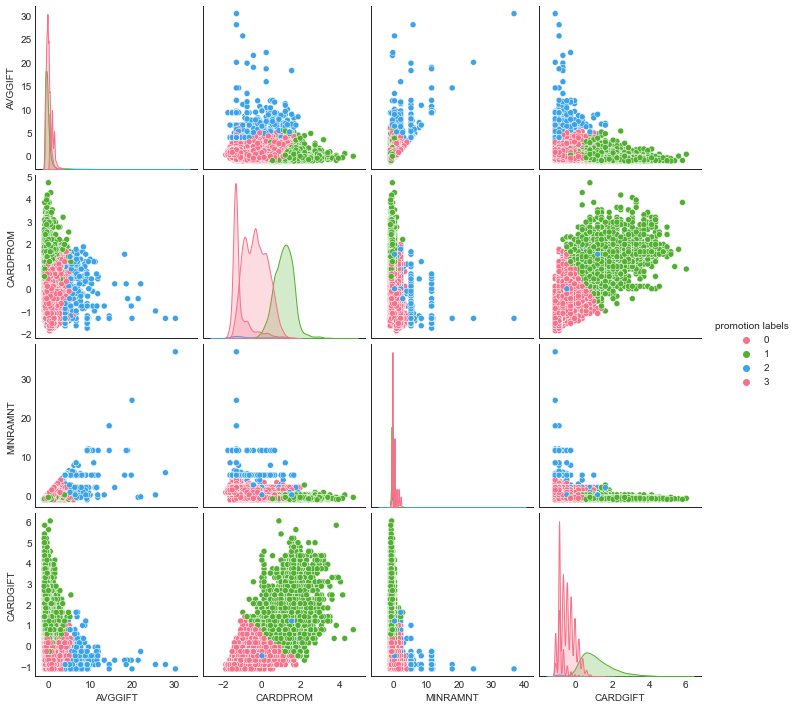

In [149]:
#the plot
sb.set_style("ticks") 
sb.pairplot(scaled_lob,hue='promotion labels',diag_kind="kde",kind="scatter",palette="husl") 
plt.show() 

In [150]:
donors_pca_df["CONTROLN"].apply(int)

4          7112
10       106016
12        85548
13        12890
20        82943
          ...  
95407    184568
95408    122706
95409    189641
95410      4693
95411    185114
Name: CONTROLN, Length: 37779, dtype: int64

## 4.2. Final Solution:

Join the Donate

In [151]:
donatenum = ward_engage['Donate Numeric labels']
donatecatg = categ_donate['Donate categoric labels']

In [152]:
donatenum = donatenum.to_frame()
donatenum['CONTROLN'] = data_complete["CONTROLN"]
donatecatg = donatecatg.to_frame()
donatecatg['CONTROLN'] = data_complete["CONTROLN"]

In [153]:
donatefinal = data_complete.merge(donatenum, on='CONTROLN')
donatefinal = donatefinal.merge(donatecatg, on='CONTROLN')

In [154]:
#como estamos só a avaliar as engage, vou apagar os premiums
donatefinal.drop(['AVGGIFT',
                  'CARDPROM',
                  'MINRAMNT',
                  'CARDGIFT',],axis=1, inplace= True)

In [155]:
cross = pd.crosstab(donatefinal['Donate Numeric labels'], donatefinal['Donate categoric labels'])
cross

Donate categoric labels,0,1,2,3
Donate Numeric labels,,,,
0,2986,3355,1672,1981
1,364,424,205,239
2,841,980,497,597
3,179,220,103,124
4,95,109,48,69


In [156]:
donatefinal['Donate Numeric labels'] = donatefinal['Donate Numeric labels'].apply(str)
donatefinal['Donate categoric labels'] = donatefinal['Donate categoric labels'].apply(str)

In [157]:
donatefinal['Numeric+Categoric'] = donatefinal['Donate Numeric labels'] + donatefinal['Donate categoric labels']

<AxesSubplot:xlabel='Numeric+Categoric', ylabel='Last donation'>

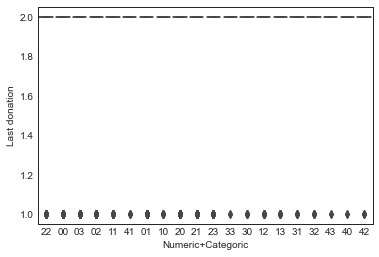

In [158]:
#some analysis to see if we need to join clusters:
f, ax = plt.subplots()
sns.boxplot(x="Numeric+Categoric", y="Last donation",
                  data=donatefinal, linewidth=1.5)

<AxesSubplot:xlabel='Numeric+Categoric', ylabel='INCOME'>

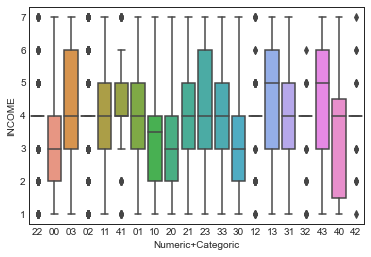

In [159]:
f, ax = plt.subplots()
sns.boxplot(x="Numeric+Categoric", y="INCOME",
                  data=donatefinal, linewidth=1.5)

In [160]:
donatefinal.head()

,Last donation,TIMELAG,HIT,AGE,INCOME,STATE,DOMAIN,MDMAUD,GENDER,MAJOR,HOMEOWNR,RFA_2,RFA_2R,CONTROLN,Donate Numeric labels,Donate categoric labels,Numeric+Categoric
0,2,14.000000,60.0,81.0,3.0,FL,S2,XXXX,F,N,H,L2F,L,7112.0,2,2,22
1,2,8.092206,0.0,68.0,2.0,KS,R3,XXXX,F,N,U,L1F,L,106016.0,0,0,00
2,2,5.000000,16.0,74.0,4.0,MN,R3,XXXX,F,N,H,L4D,L,85548.0,0,3,03
3,2,1.000000,0.0,74.0,4.0,LA,T2,XXXX,M,N,O,L1G,L,12890.0,0,2,02
4,2,12.000000,10.0,65.0,3.0,MN,S1,XXXX,F,N,H,L3D,L,82943.0,0,3,03


<AxesSubplot:xlabel='Numeric+Categoric', ylabel='Count_Hc'>

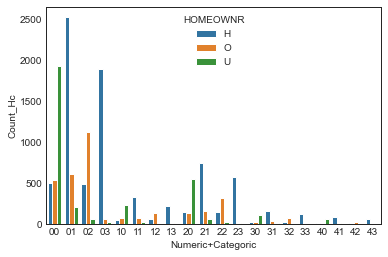

In [161]:
#Home owner
Hc = donatefinal.groupby(['Numeric+Categoric','HOMEOWNR'])['CONTROLN'].nunique()
Hc=Hc.reset_index()
Hc.rename(columns = {'CONTROLN': 'Count_Hc'}, inplace = True)
sns.barplot(x=Hc['Numeric+Categoric'], y=Hc['Count_Hc'], hue=Hc['HOMEOWNR'])

<AxesSubplot:xlabel='Numeric+Categoric', ylabel='Count_GL'>

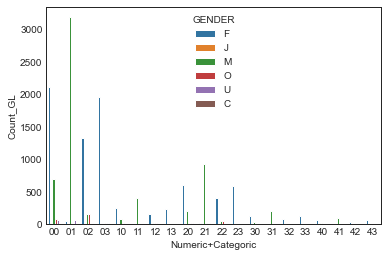

In [162]:
#Gender
GL = donatefinal.groupby(['Numeric+Categoric','GENDER'])['CONTROLN'].nunique()
GL=GL.reset_index()
GL.rename(columns = {'CONTROLN': 'Count_GL'}, inplace = True)
sns.barplot(x=GL['Numeric+Categoric'], y=GL['Count_GL'], hue=GL['GENDER'])

Join the Donate  with the Promotion:

In [163]:
donate1 = donatefinal ['Numeric+Categoric']
promotion1 = scaled_lob['promotion labels']

In [164]:
donate1 = donate1.to_frame()
donate1['CONTROLN'] = data_complete['CONTROLN']
promotion1 = promotion1.to_frame()
promotion1['CONTROLN'] = data_complete['CONTROLN']

In [165]:
datafinal = data_complete.merge(donate1, on='CONTROLN')
datafinal = datafinal.merge(promotion1, on='CONTROLN')

In [166]:
cross = pd.crosstab(datafinal['Numeric+Categoric'], datafinal['promotion labels'])
cross

promotion labels,0,1,2,3
Numeric+Categoric,,,,
00,609,408,10,131
01,634,443,14,278
02,311,234,7,125
03,364,242,6,170
10,66,45,1,17
11,81,66,2,31
12,51,23,0,16
13,46,29,2,28
20,176,119,3,30


In [167]:
datafinal['donate labels'] = datafinal['Numeric+Categoric'].apply(str)
datafinal['promotion labels'] = datafinal['promotion labels'].apply(str)
datafinal['donate+promotion'] = datafinal['donate labels'] + datafinal['promotion labels']

In [168]:
datafinal.drop(['Numeric+Categoric',
                'promotion labels',
                'Last donation'],axis=1, inplace= True)

In [169]:
datafinal.head()

,TIMELAG,HIT,AGE,INCOME,AVGGIFT,CARDPROM,MINRAMNT,CARDGIFT,STATE,DOMAIN,MDMAUD,GENDER,MAJOR,HOMEOWNR,RFA_2,RFA_2R,CONTROLN,donate labels,donate+promotion
0,14.000000,60.0,81.0,3.0,6.864865,43.0,3.0,8.0,FL,S2,XXXX,F,N,H,L2F,L,7112.0,03,031
1,8.092206,0.0,68.0,2.0,20.000000,6.0,20.0,1.0,KS,R3,XXXX,F,N,U,L1F,L,106016.0,01,010
2,5.000000,16.0,74.0,4.0,5.333333,21.0,4.0,5.0,MN,R3,XXXX,F,N,H,L4D,L,85548.0,02,021
3,1.000000,0.0,74.0,4.0,20.416667,23.0,5.0,4.0,LA,T2,XXXX,M,N,O,L1G,L,12890.0,10,100
4,12.000000,10.0,65.0,3.0,4.066667,26.0,2.0,10.0,MN,S1,XXXX,F,N,H,L3D,L,82943.0,10,103


<AxesSubplot:xlabel='donate+promotion', ylabel='Count_Hc'>

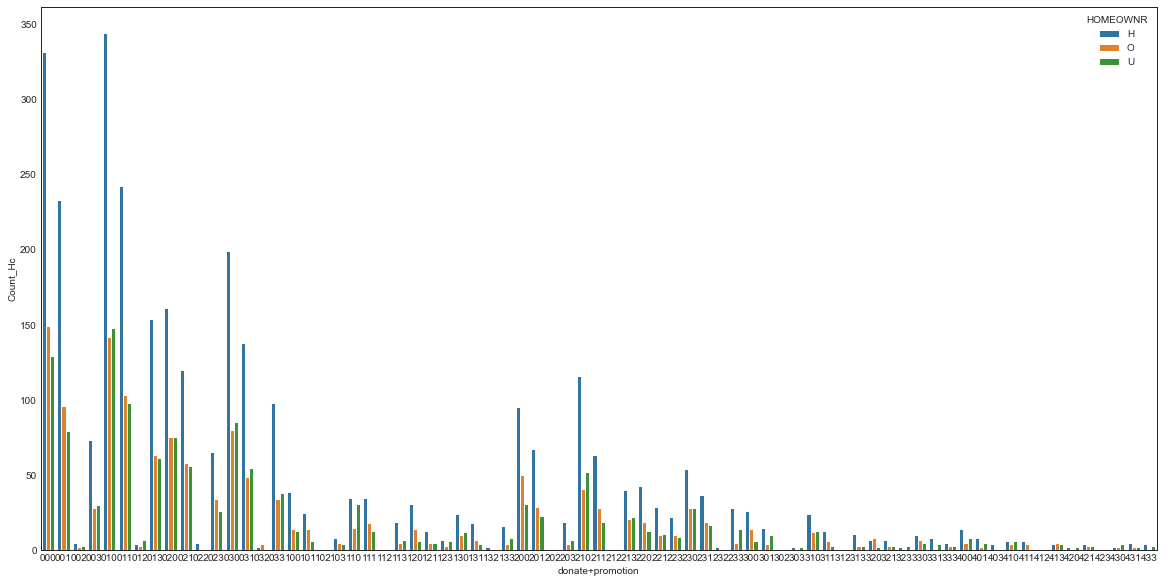

In [170]:
#HOMEOWNR
plt.figure(figsize=(20,10))
Hc = datafinal.groupby(['donate+promotion','HOMEOWNR'])['CONTROLN'].nunique()
Hc=Hc.reset_index()
Hc.rename(columns = {'CONTROLN' : 'Count_Hc'}, inplace = True)
sns.barplot(x=Hc['donate+promotion'], y=Hc['Count_Hc'], hue=Hc['HOMEOWNR'])

<AxesSubplot:xlabel='donate+promotion', ylabel='Count_Hc'>

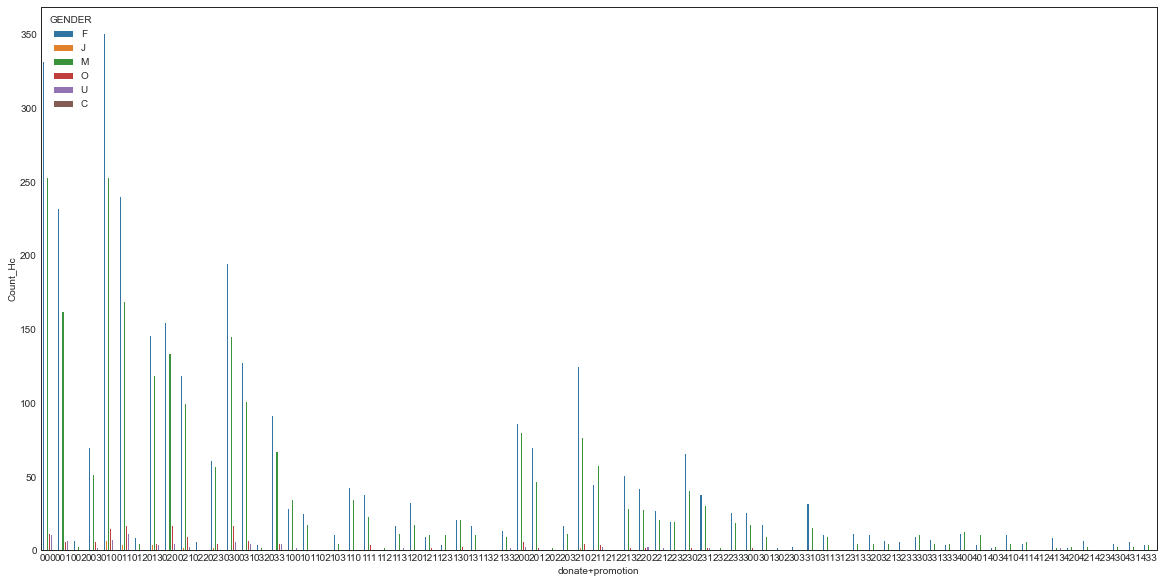

In [171]:
#GENDER
plt.figure(figsize=(20,10))
Hc = datafinal.groupby(['donate+promotion','GENDER'])['CONTROLN'].nunique()
Hc=Hc.reset_index()
Hc.rename(columns = {'CONTROLN' : 'Count_Hc'}, inplace = True)
sns.barplot(x=Hc['donate+promotion'], y=Hc['Count_Hc'], hue=Hc['GENDER'])

Join the clusters with identical characteristics

In [172]:

datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('300','5').str.replace('301','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('303','5').str.replace('311','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('320','5').str.replace('321','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('322','5').str.replace('341','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('340','5').str.replace('342','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('333','5').str.replace('343','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('330','5').str.replace('302','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('313','5').str.replace('310','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('331','5').str.replace('323','5')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('312','5').str.replace('332','5')

In [173]:
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('400','4').str.replace('401','4')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('410','4').str.replace('411','4')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('403','4').str.replace('413','4')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('420','4').str.replace('441','4')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('440','4').str.replace('421','4')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('433','4').str.replace('430','4')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('443','4').str.replace('422','4')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('423','4').str.replace('412','4')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('431','4')

datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('200','3').str.replace('210','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('201','3').str.replace('211','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('203','3').str.replace('220','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('230','3').str.replace('241','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('233','3').str.replace('213','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('243','3').str.replace('210','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('221','3').str.replace('240','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('223','3').str.replace('242','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('202','3').str.replace('212','3')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('231','3').str.replace('232','3')

In [174]:
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('100','2').str.replace('110','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('101','2').str.replace('111','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('103','2').str.replace('120','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('133','2').str.replace('121','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('130','2').str.replace('140','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('112','2').str.replace('113','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('123','2').str.replace('143','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('102','2').str.replace('141','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('122','2').str.replace('142','2')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('131','2').str.replace('132','2')

datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('25','1').str.replace('50','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('05','1').str.replace('51','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('15','1').str.replace('53','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('35','1').str.replace('45','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('011','1').str.replace('013','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('001','1').str.replace('003','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('021','1').str.replace('023','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('043','1').str.replace('033','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('040','1').str.replace('041','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('022','1').str.replace('002','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('012','1').str.replace('032','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('020','1').str.replace('030','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('010','1').str.replace('000','1')
datafinal['donate+promotion'] = datafinal['donate+promotion'].str.replace('042','1').str.replace('031','1')

**Conclusion: We end up with 5 clusters**

## 4.3 Analysis for the marketing campaign

In [175]:
C1 = datafinal[datafinal['donate+promotion']=='1']
C1.describe()

,TIMELAG,HIT,AGE,INCOME,AVGGIFT,CARDPROM,MINRAMNT,CARDGIFT,CONTROLN
count,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000
mean,7.724825,3.170848,63.367787,3.872554,12.871331,18.089814,7.619335,5.316357,94249.245861
std,5.859804,6.524900,16.675566,1.654715,10.056647,9.076226,7.734992,4.682600,58536.113863
min,0.000000,0.000000,9.000000,1.000000,2.260870,2.000000,0.000000,0.000000,7.000000
25%,4.000000,0.000000,51.000000,3.000000,7.591176,10.000000,3.000000,2.000000,42185.750000
50%,7.000000,0.000000,65.000000,4.000000,10.800000,18.000000,5.000000,4.000000,94252.000000
75%,10.000000,3.000000,77.000000,5.000000,15.000000,26.000000,10.000000,8.000000,145289.000000
max,90.000000,65.000000,91.000000,7.000000,215.625000,50.000000,103.000000,32.000000,191622.000000


In [176]:
C2 = datafinal[datafinal['donate+promotion']=='2']
C2.describe()

,TIMELAG,HIT,AGE,INCOME,AVGGIFT,CARDPROM,MINRAMNT,CARDGIFT,CONTROLN
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,7.924435,3.265873,62.755952,3.839286,12.759337,17.648810,8.414325,5.323413,97153.718254
std,5.658042,6.950889,16.978819,1.688449,9.906444,9.003074,10.243330,4.618289,57424.462159
min,0.000000,0.000000,10.000000,1.000000,1.833333,3.000000,0.000000,0.000000,94.000000
25%,4.000000,0.000000,49.000000,2.000000,7.240132,9.000000,3.000000,2.000000,48795.000000
50%,8.000000,0.000000,63.000000,4.000000,11.100000,17.000000,5.000000,4.000000,96938.000000
75%,10.000000,3.000000,78.000000,5.000000,15.000000,25.000000,10.000000,8.000000,145848.750000
max,47.000000,63.000000,91.000000,7.000000,150.000000,40.000000,150.000000,23.000000,191341.000000


In [177]:
C3 = datafinal[datafinal['donate+promotion']=='3']
C3.describe()

,TIMELAG,HIT,AGE,INCOME,AVGGIFT,CARDPROM,MINRAMNT,CARDGIFT,CONTROLN
count,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,7.879496,3.152212,62.222124,3.815929,12.677356,17.838053,7.770150,5.238053,92122.785841
std,5.733904,6.920645,17.315118,1.637610,7.578953,9.128129,7.183264,4.673101,57449.188071
min,0.000000,0.000000,10.000000,1.000000,2.200000,2.000000,0.000000,0.000000,103.000000
25%,4.000000,0.000000,49.000000,2.000000,7.729167,10.000000,3.000000,2.000000,41186.250000
50%,7.000000,0.000000,62.000000,4.000000,11.027929,17.000000,5.000000,4.000000,90810.000000
75%,10.000000,3.000000,77.000000,5.000000,15.000000,26.000000,10.000000,8.000000,140426.000000
max,56.000000,75.000000,91.000000,7.000000,110.000000,45.000000,59.000000,27.000000,191199.000000


In [178]:
C4 = datafinal[datafinal['donate+promotion']=='4']
C4.describe()

,TIMELAG,HIT,AGE,INCOME,AVGGIFT,CARDPROM,MINRAMNT,CARDGIFT,CONTROLN
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,7.501953,3.821705,65.364341,3.813953,12.570940,19.000000,7.348837,5.829457,87076.852713
std,5.419988,7.879413,16.088592,1.633475,6.731571,9.013011,6.424320,5.114508,62563.023176
min,0.000000,0.000000,30.000000,1.000000,3.166667,4.000000,0.000000,0.000000,844.000000
25%,4.000000,0.000000,52.000000,2.000000,8.125000,12.000000,3.000000,2.000000,24678.000000
50%,7.000000,0.000000,68.000000,4.000000,10.750000,20.000000,5.000000,4.000000,86339.000000
75%,8.092206,5.000000,79.000000,5.000000,15.000000,25.000000,10.000000,8.000000,142314.000000
max,36.000000,44.000000,91.000000,7.000000,36.250000,44.000000,25.000000,25.000000,189846.000000


In [179]:
C5 = datafinal[datafinal['donate+promotion']=='5']
C5.describe()

,TIMELAG,HIT,AGE,INCOME,AVGGIFT,CARDPROM,MINRAMNT,CARDGIFT,CONTROLN
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,7.918931,3.478261,63.754941,3.996047,12.831952,18.474308,7.811581,5.620553,93288.980237
std,5.697941,7.441073,16.527611,1.658308,8.722144,9.100210,8.106387,4.545001,58973.357827
min,0.000000,0.000000,10.000000,1.000000,2.526316,4.000000,0.020000,0.000000,60.000000
25%,4.000000,0.000000,51.000000,3.000000,7.125000,10.000000,3.000000,2.000000,38828.000000
50%,7.000000,0.000000,65.000000,4.000000,10.923077,19.000000,5.000000,4.000000,92510.000000
75%,11.000000,3.000000,78.000000,5.000000,15.800000,25.000000,10.000000,8.000000,145830.000000
max,36.000000,53.000000,91.000000,7.000000,75.000000,49.000000,53.000000,21.000000,190016.000000


In [180]:
#Which customer belongs to each cluster?
final_labels=datafinal[['CONTROLN', 'donate+promotion']]
final_labels

,CONTROLN,donate+promotion
0,7112.0,1
1,106016.0,1
2,85548.0,1
3,12890.0,2
4,82943.0,2
...,...,...
5997,60908.0,1
5998,131386.0,1
5999,79725.0,1
6000,23748.0,1


In [181]:
final_labels['donate+promotion'].value_counts()

1    3986
3    1130
2     504
5     253
4     129
Name: donate+promotion, dtype: int64

## 5. DBSCAN outlier's Analysis

For DONATE:

In [182]:
#NORMALIZATION- Just the scaled_engage
scaler = StandardScaler()
scaled_engage1 = pd.DataFrame(scaler.fit_transform(numerical_df), 
                           columns=['Last donation',
                                    'TIMELAG', 
                                    'HIT',
                                    'AGE',
                                    'INCOME'])
#to scaled_engage
# The following bandwidth can be automatically detected using
my_bandwidth = estimate_bandwidth(scaled_engage1,quantile=0.2,n_samples=1000)

db_engage = DBSCAN(eps=my_bandwidth, min_samples=100).fit(scaled_engage1)
labels_engage = db_engage.labels_



# Number of clusters in labels, ignoring noise if present.
n_clusters_eng = len(set(labels_engage)) - (1 if -1 in labels_engage else 0)
n_noise_eng = list(labels_engage).count(-1)

unique_clusters, counts_clusters = np.unique(db_engage.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))


print('Estimated number of clusters: %d' % n_clusters_eng)
print('Estimated number of noise points: %d' % n_noise_eng)
#labels associated to each individual
scaled_engage1.insert((scaled_engage1.shape[1]),'Donate outliers labels', labels_engage)

[[   -1     0     1]
 [  103 36167  1509]]
Estimated number of clusters: 2
Estimated number of noise points: 103


For Promotion:

In [183]:
#NORMALIZATION- Just the numeric variables
scaler = StandardScaler()
scaled_lob1 = pd.DataFrame(scaler.fit_transform(promotion_df), 
                           columns=['AVGGIFT',
                                   'CARDPROM',
                                   'MINRAMNT',
                                   'CARDGIFT'])

#to scaled_lob
# The following bandwidth can be automatically detected using
my_bandwidth = estimate_bandwidth(scaled_lob1,quantile=0.2,n_samples=1000)

db_lob = DBSCAN(eps=my_bandwidth, min_samples=100).fit(scaled_lob1)
labels_lob = db_lob.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_lob)) - (1 if -1 in labels_lob else 0)
n_noise_ = list(labels_lob).count(-1)

unique_clusters, counts_clusters = np.unique(db_lob.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
scaled_lob1.insert((scaled_lob1.shape[1]),'Promotion outliers labels',labels_lob)

[[   -1     0]
 [  249 37530]]
Estimated number of clusters: 1
Estimated number of noise points: 249


**join the labels to the final data set**

In [184]:
donatenoise = scaled_engage1['Donate outliers labels']
promotionnosie = scaled_lob1['Promotion outliers labels']
donatenoise = donatenoise.to_frame()
promotionnosie = promotionnosie.to_frame()
donatenoise['CONTROLN'] = data_complete['CONTROLN']
promotionnosie['CONTROLN'] = data_complete['CONTROLN']
datafinal = datafinal.merge(donatenoise, on='CONTROLN')
datafinal = datafinal.merge(promotionnosie, on='CONTROLN')

In [185]:
# How many outliers are in each cluster for engage?
A = datafinal[datafinal['Donate outliers labels']==-1]
A['donate+promotion'].value_counts()

1    13
3     4
2     3
5     2
4     1
Name: donate+promotion, dtype: int64

In [186]:
#the tables for each cluster only with the outliers
O1 = A[A['donate+promotion']=='1']
O2 = A[A['donate+promotion']=='2']
O3 = A[A['donate+promotion']=='3']
O4 = A[A['donate+promotion']=='4']
O5 = A[A['donate+promotion']=='5']

In [188]:
#The table that represents the only cluster with outliers in engage and lob
O1

,TIMELAG,HIT,AGE,INCOME,AVGGIFT,CARDPROM,MINRAMNT,CARDGIFT,STATE,DOMAIN,MDMAUD,GENDER,MAJOR,HOMEOWNR,RFA_2,RFA_2R,CONTROLN,donate labels,donate+promotion,Donate outliers labels,Promotion outliers labels
116,6.000000,0.0,84.0,4.0,13.000000,9.0,10.0,2.0,FL,C2,XXXX,F,N,O,L2F,L,39871.0,01,1,-1,0
157,1.000000,2.0,21.0,5.0,3.812500,15.0,2.0,7.0,AL,C2,XXXX,F,N,H,L4D,L,48286.0,01,1,-1,0
378,2.000000,0.0,69.0,7.0,8.333333,8.0,5.0,2.0,TN,R3,XXXX,M,N,O,L3E,L,190824.0,01,1,-1,0
870,9.000000,2.0,53.0,4.0,8.800000,17.0,3.0,4.0,CA,C1,XXXX,M,N,H,L1F,L,165476.0,00,1,-1,0
1245,8.092206,0.0,57.0,6.0,23.000000,4.0,23.0,1.0,NV,R2,XXXX,F,N,H,L1F,L,142013.0,00,1,-1,0
1662,5.000000,1.0,54.0,7.0,6.000000,19.0,3.0,9.0,IL,T2,XXXX,M,N,H,L4D,L,96246.0,01,1,-1,0
2300,12.000000,0.0,37.0,4.0,15.000000,9.0,10.0,1.0,NC,S1,XXXX,F,N,O,L1F,L,157212.0,01,1,-1,0
3113,4.000000,1.0,44.0,6.0,5.875000,16.0,5.0,6.0,NM,S1,XXXX,F,N,H,L4E,L,139418.0,01,1,-1,0
3310,8.092206,0.0,54.0,4.0,25.000000,6.0,25.0,1.0,GA,T3,XXXX,F,N,O,L1G,L,27886.0,01,1,-1,0
3432,15.000000,0.0,63.0,4.0,11.000000,14.0,5.0,3.0,KS,R1,XXXX,F,N,O,L1F,L,105580.0,00,1,-1,0
